In [1]:
import json
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
with open('siparis.json',encoding="utf8") as f:
    data = json.load(f)


In [3]:
df = pd.DataFrame(data,columns = ['Comment','Brand','Sector'])
len(df)

98342

# Konu Basliklari

In [4]:
print(df.Brand.value_counts())
a = df.Brand.value_counts()


Sürat Kargo                           7632
Boyner                                5556
Çiçek Sepeti                          5123
Aras Kargo                            4297
MNG Kargo                             3621
Penti                                 3184
N11                                   2460
Horoz Lojistik                        2206
DeFacto                               2029
Karaca Züccaciye                      1688
Kitap Seç                             1667
hepsiJET                              1458
Gratis                                1301
Trendyol Express                      1133
UPS Türkiye                           1107
LC Waikiki                            1067
Yemek Sepeti                          1062
Bkm Kitap﻿                            1005
Koçtaş                                 891
FLO Ayakkabı                           811
D&R                                    808
Domino's Pizza                         806
Evform                                 796
Tekzen     

In [5]:
df["Sector"] = df.Brand.map(lambda sentences: None )

In [6]:
taşıma_list = ["Aras Kargo","Sürat Kargo","MNG Kargo","Horoz Lojistik","Trendyol Express","UPS Türkiye","hepsiJET","Getir"]
for i in taşıma_list:
    df.Sector[df.Brand == i ] = "Taşıma"

In [7]:
giyim_list = ["Penti","Boyner","DeFacto","Gratis", "LC Waikiki","FLO Ayakkabı","Bershka"]
for i in giyim_list:
    df.Sector[df.Brand == i ] = "Giyim"

In [8]:
yemek_list = ["Yemek Sepeti","Domino's Pizza","Protein Market"]
for i in yemek_list:
    df.Sector[df.Brand == i ] = "Yemek"

In [9]:
teknoloji_list = ["Media Markt"]
for i in teknoloji_list:
    df.Sector[df.Brand == i ] = "Teknoloji"

In [10]:
ev_esyasi_list = ["Evform","Tekzen","IKEA"]
for i in ev_esyasi_list:
    df.Sector[df.Brand == i ] = "EvEsyasi"

In [11]:
kitap_list = ["Kitap Seç","Bkm Kitap","D&R"]
for i in kitap_list:
    df.Sector[df.Brand == i ] = "Kitap"

In [12]:
ticaret_sitesi_list = ["Çiçek Sepeti","N11"]
for i in ticaret_sitesi_list:
    df.Sector[df.Brand == i ] = "ETicaret"

In [13]:
for i in df["Sector"]:
    print(i)

Giyim
Giyim
Giyim
None
None
Kitap
None
None
None
Giyim
None
Giyim
Taşıma
Giyim
Taşıma
None
None
Giyim
None
Taşıma
None
None
Taşıma
None
None
None
Taşıma
None
Taşıma
Kitap
None
None
Kitap
None
Giyim
None
Giyim
Kitap
None
Kitap
Kitap
None
None
None
ETicaret
Giyim
None
Kitap
EvEsyasi
Giyim
None
None
None
None
None
None
None
None
None
Giyim
Yemek
None
None
Giyim
Yemek
None
None
Yemek
Taşıma
Taşıma
None
Giyim
Taşıma
Kitap
None
Yemek
Yemek
Giyim
Yemek
None
None
None
Giyim
None
None
Kitap
None
Yemek
Taşıma
Giyim
Giyim
None
Giyim
Giyim
None
None
None
Yemek
Kitap
None
None
Giyim
None
Giyim
Taşıma
Taşıma
None
Taşıma
None
None
None
None
None
None
EvEsyasi
None
None
Kitap
None
None
None
Yemek
Taşıma
None
Taşıma
None
Giyim
Yemek
None
None
None
Taşıma
Yemek
EvEsyasi
None
None
None
Giyim
Giyim
None
None
None
Yemek
EvEsyasi
None
Taşıma
Taşıma
ETicaret
None
None
Giyim
None
Taşıma
EvEsyasi
None
Giyim
Yemek
None
None
None
None
None
Giyim
Giyim
None
None
Giyim
Taşıma
Taşıma
None
Kitap
Giyim
None
None
Giyi

Taşıma
None
None
None
None
Giyim
Giyim
None
None
Giyim
Taşıma
Giyim
Giyim
Giyim
None
None
Giyim
None
Taşıma
None
Giyim
None
Giyim
None
None
None
None
None
None
EvEsyasi
None
None
Taşıma
Taşıma
Giyim
Taşıma
None
None
None
None
None
Giyim
None
None
Taşıma
None
None
None
ETicaret
Giyim
Giyim
Taşıma
None
Yemek
ETicaret
Giyim
None
None
None
Taşıma
None
Taşıma
Yemek
None
None
Taşıma
None
None
ETicaret
None
Giyim
Giyim
None
Taşıma
None
Giyim
None
Giyim
None
None
None
None
None
Taşıma
Giyim
Taşıma
Giyim
Taşıma
None
None
Taşıma
Yemek
None
Yemek
None
ETicaret
Giyim
None
None
ETicaret
Taşıma
Taşıma
None
None
None
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
None
None
None
None
Yemek
None
None
None
None
None
Taşıma
None
Taşıma
None
None
None
EvEsyasi
None
Teknoloji
None
None
None
Taşıma
None
Kitap
None
None
None
Taşıma
None
Taşıma
EvEsyasi
None
Yemek
ETicaret
Taşıma
Taşıma
None
None
Taşıma
None
Taşıma
Kitap
None
EvEsyasi
None
None
Taşıma
None
None
Yemek
Giyim
Giyim
None
None
None
Giyim
Taşıma
Kitap
None

Taşıma
Taşıma
None
None
None
ETicaret
None
Giyim
Kitap
None
Taşıma
None
None
None
None
None
None
Kitap
None
None
None
Taşıma
None
Taşıma
None
None
Taşıma
None
Kitap
None
None
None
Taşıma
None
None
None
Taşıma
None
None
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
None
None
None
EvEsyasi
Kitap
EvEsyasi
Taşıma
None
None
None
None
None
Taşıma
None
None
EvEsyasi
None
None
Taşıma
None
None
None
None
Taşıma
None
None
None
None
Giyim
Taşıma
Yemek
Taşıma
ETicaret
Taşıma
ETicaret
None
Taşıma
None
Kitap
Giyim
Taşıma
None
None
None
None
Yemek
None
Teknoloji
Taşıma
Giyim
Taşıma
None
Giyim
None
Giyim
Taşıma
None
Taşıma
Taşıma
Taşıma
Taşıma
None
None
Taşıma
None
None
None
Taşıma
None
None
None
None
None
None
Kitap
None
None
Taşıma
None
Giyim
Giyim
None
Taşıma
None
None
None
Taşıma
None
None
None
None
None
None
Giyim
None
None
None
ETicaret
Kitap
None
None
None
Taşıma
Taşıma
Yemek
None
None
Giyim
Taşıma
Taşıma
None
Giyim
None
None
None
Yemek
Taşıma
Taşıma
None
Taşıma
None
None
Giyim
None
Giyim
None
Giy

None
None
None
Taşıma
None
None
None
Taşıma
None
Yemek
Yemek
None
None
Taşıma
None
Yemek
None
Giyim
None
Kitap
None
Kitap
None
Taşıma
EvEsyasi
None
Giyim
None
Taşıma
Giyim
None
None
Taşıma
Taşıma
None
Taşıma
None
None
Taşıma
None
ETicaret
Yemek
Giyim
None
None
Giyim
Giyim
Taşıma
None
None
None
Taşıma
Teknoloji
ETicaret
Taşıma
None
None
Yemek
Taşıma
None
Taşıma
Taşıma
None
Teknoloji
None
None
Kitap
None
None
Taşıma
ETicaret
None
Giyim
None
None
Yemek
Yemek
None
None
None
Taşıma
None
None
None
None
None
ETicaret
None
None
Taşıma
ETicaret
Teknoloji
None
None
Taşıma
Kitap
None
None
Giyim
None
None
None
None
Giyim
None
None
Kitap
None
Giyim
Taşıma
None
Taşıma
None
None
None
None
None
None
None
ETicaret
None
None
EvEsyasi
None
None
None
None
Kitap
None
None
None
None
None
Taşıma
Giyim
None
None
ETicaret
None
Taşıma
None
ETicaret
None
None
None
Yemek
EvEsyasi
Taşıma
ETicaret
None
None
Yemek
Giyim
None
None
Taşıma
None
Taşıma
None
None
Taşıma
None
None
ETicaret
None
Giyim
Taşıma
ETicaret
Taşım

None
None
None
EvEsyasi
None
None
None
Taşıma
None
Taşıma
None
None
ETicaret
None
Taşıma
Taşıma
Taşıma
Giyim
None
Kitap
Taşıma
Taşıma
Taşıma
None
None
ETicaret
Yemek
None
Giyim
None
None
Giyim
Taşıma
None
Taşıma
Giyim
None
Taşıma
ETicaret
Kitap
EvEsyasi
None
None
None
Taşıma
Taşıma
None
None
None
None
None
None
None
Taşıma
None
Giyim
Giyim
Giyim
Taşıma
None
Kitap
None
Taşıma
None
Taşıma
None
None
Taşıma
Taşıma
Yemek
None
Giyim
Taşıma
Taşıma
Yemek
None
Taşıma
None
None
None
ETicaret
Taşıma
None
Giyim
EvEsyasi
None
None
None
None
None
None
Teknoloji
None
None
None
None
None
None
Giyim
None
None
Taşıma
None
None
Giyim
None
None
Giyim
None
None
Taşıma
None
None
None
Giyim
Taşıma
ETicaret
Giyim
Giyim
Giyim
None
None
Kitap
None
Giyim
None
Kitap
Taşıma
None
Taşıma
None
Taşıma
None
None
None
Taşıma
Taşıma
None
None
Taşıma
None
None
None
None
None
None
None
None
Taşıma
None
None
Giyim
None
Giyim
None
None
ETicaret
Taşıma
EvEsyasi
Kitap
None
Taşıma
None
None
None
Taşıma
None
Taşıma
None
Kitap
Ki

Taşıma
Taşıma
Taşıma
Kitap
Taşıma
EvEsyasi
Taşıma
Giyim
ETicaret
None
None
None
Taşıma
None
EvEsyasi
None
ETicaret
None
None
None
None
None
None
None
None
Giyim
Taşıma
None
None
None
Taşıma
None
None
Yemek
Yemek
Taşıma
Giyim
Yemek
ETicaret
Taşıma
Taşıma
None
None
Taşıma
Taşıma
Kitap
EvEsyasi
Giyim
None
Kitap
Taşıma
Kitap
ETicaret
ETicaret
Giyim
Giyim
Taşıma
Kitap
None
None
Taşıma
None
Taşıma
None
None
ETicaret
ETicaret
None
None
Taşıma
None
Giyim
Yemek
Teknoloji
None
Giyim
Giyim
None
None
None
None
None
Giyim
None
None
None
None
None
None
EvEsyasi
Teknoloji
None
None
None
Kitap
None
Kitap
ETicaret
None
Yemek
Taşıma
None
None
Yemek
Yemek
Yemek
ETicaret
ETicaret
None
None
None
None
Taşıma
Yemek
None
None
Teknoloji
None
Giyim
None
None
None
Giyim
Taşıma
Yemek
None
Taşıma
ETicaret
Yemek
None
Taşıma
None
None
Taşıma
ETicaret
Giyim
Yemek
Taşıma
None
None
Giyim
None
None
Taşıma
None
Taşıma
None
None
EvEsyasi
Taşıma
None
Kitap
Yemek
Taşıma
Yemek
None
Kitap
None
EvEsyasi
Giyim
None
Taşıma
Giyim

Yemek
None
None
None
None
Taşıma
Taşıma
Taşıma
None
Giyim
None
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
Giyim
None
Taşıma
None
None
Taşıma
None
None
Giyim
Giyim
None
Kitap
None
Teknoloji
ETicaret
None
Taşıma
Yemek
EvEsyasi
None
None
None
Taşıma
EvEsyasi
None
Taşıma
None
ETicaret
Taşıma
Taşıma
None
None
Yemek
Taşıma
None
None
Taşıma
None
Kitap
Taşıma
EvEsyasi
Taşıma
ETicaret
Giyim
ETicaret
None
None
EvEsyasi
Taşıma
None
Taşıma
None
Giyim
None
None
None
None
Giyim
ETicaret
None
Giyim
None
None
Taşıma
None
EvEsyasi
None
None
None
Giyim
Taşıma
Taşıma
None
ETicaret
None
Giyim
Giyim
None
None
Yemek
Yemek
Giyim
None
Giyim
Giyim
None
Taşıma
None
None
None
None
None
None
Giyim
None
None
Yemek
Yemek
None
None
Taşıma
Yemek
Giyim
None
Kitap
None
Taşıma
None
Giyim
Taşıma
None
None
None
None
None
None
None
None
None
Giyim
Giyim
Taşıma
None
Taşıma
None
None
None
None
Kitap
None
Taşıma
None
None
None
Giyim
Giyim
None
None
Giyim
Giyim
Yemek
Giyim
None
EvEsyasi
Kitap
None
None
None
ETicaret
None
Giyim

None
Giyim
Kitap
None
None
None
None
Giyim
None
None
EvEsyasi
None
Taşıma
None
None
Taşıma
None
ETicaret
None
Taşıma
None
Taşıma
None
None
None
Taşıma
Taşıma
None
None
EvEsyasi
Taşıma
None
Giyim
None
None
None
None
Taşıma
Taşıma
ETicaret
ETicaret
None
None
Taşıma
None
Giyim
None
None
Taşıma
Taşıma
Taşıma
None
None
None
Taşıma
Taşıma
None
Giyim
Giyim
None
None
None
Giyim
Giyim
Taşıma
None
None
None
None
None
None
ETicaret
None
ETicaret
None
None
Taşıma
Taşıma
Taşıma
Giyim
Kitap
Taşıma
None
Giyim
Giyim
None
None
Giyim
Taşıma
Taşıma
Taşıma
None
None
EvEsyasi
None
Kitap
None
None
None
EvEsyasi
None
None
None
None
None
Taşıma
Yemek
None
None
None
None
None
Taşıma
ETicaret
Taşıma
Giyim
None
Taşıma
Taşıma
Taşıma
Kitap
Giyim
Giyim
Teknoloji
Giyim
None
EvEsyasi
None
ETicaret
None
None
Kitap
None
None
Taşıma
None
EvEsyasi
None
None
Taşıma
Taşıma
Giyim
None
EvEsyasi
None
Taşıma
EvEsyasi
None
Giyim
None
Teknoloji
None
None
Taşıma
None
None
None
None
None
Giyim
None
None
None
None
None
None
None
No

Taşıma
Giyim
None
None
Yemek
Taşıma
Taşıma
Taşıma
None
Giyim
Giyim
None
None
None
None
None
None
EvEsyasi
None
Taşıma
None
None
None
Taşıma
None
Yemek
Yemek
None
None
None
Taşıma
None
Giyim
Taşıma
None
None
Taşıma
None
None
Taşıma
Giyim
None
None
None
Taşıma
None
None
None
None
Taşıma
None
ETicaret
None
Taşıma
Giyim
Taşıma
Taşıma
Yemek
None
Taşıma
Yemek
Giyim
None
None
Yemek
Taşıma
Giyim
Giyim
Teknoloji
None
None
None
None
None
None
Giyim
None
None
Taşıma
None
Taşıma
Taşıma
Taşıma
None
None
Taşıma
None
Giyim
Taşıma
Taşıma
None
None
None
ETicaret
ETicaret
Taşıma
Kitap
None
Giyim
Taşıma
None
ETicaret
None
None
None
Yemek
None
ETicaret
Taşıma
EvEsyasi
Teknoloji
Taşıma
Teknoloji
None
Teknoloji
Kitap
ETicaret
Kitap
None
None
None
Giyim
None
Taşıma
Taşıma
None
Taşıma
ETicaret
None
None
None
Taşıma
Kitap
Giyim
Giyim
None
Taşıma
Giyim
Taşıma
None
Giyim
None
None
Yemek
ETicaret
Taşıma
ETicaret
Giyim
Giyim
None
Kitap
Giyim
None
Taşıma
None
None
Taşıma
EvEsyasi
None
Giyim
Taşıma
None
None
None
No

Giyim
Giyim
Taşıma
Taşıma
Giyim
None
None
Taşıma
Giyim
Taşıma
None
None
Yemek
Taşıma
Taşıma
Taşıma
Giyim
None
Taşıma
Giyim
Giyim
None
None
None
Taşıma
None
None
Giyim
Yemek
Yemek
None
None
Taşıma
None
Kitap
Taşıma
Giyim
ETicaret
None
None
ETicaret
Giyim
Kitap
None
None
None
None
Taşıma
ETicaret
None
None
None
None
Taşıma
None
None
None
None
Taşıma
None
None
Giyim
None
ETicaret
None
Giyim
EvEsyasi
None
None
None
None
None
Giyim
Giyim
Yemek
Taşıma
None
Taşıma
None
Taşıma
ETicaret
Giyim
None
Giyim
Taşıma
None
Taşıma
Taşıma
Taşıma
None
None
EvEsyasi
EvEsyasi
ETicaret
Taşıma
None
ETicaret
Taşıma
Taşıma
None
None
Giyim
Kitap
Giyim
None
Taşıma
Taşıma
None
None
None
None
None
None
ETicaret
ETicaret
Taşıma
None
Taşıma
None
Taşıma
None
Yemek
EvEsyasi
Taşıma
None
Taşıma
None
None
EvEsyasi
None
None
None
None
Taşıma
Giyim
None
None
ETicaret
None
None
None
Taşıma
None
None
Kitap
None
EvEsyasi
Giyim
None
None
None
Taşıma
ETicaret
Taşıma
Yemek
None
Giyim
None
Giyim
None
ETicaret
Kitap
None
None
Kitap

Taşıma
Giyim
Giyim
Yemek
Yemek
None
None
Taşıma
None
None
None
Taşıma
None
None
None
Taşıma
None
Taşıma
None
Taşıma
None
Giyim
None
Giyim
None
Taşıma
None
Giyim
EvEsyasi
None
None
ETicaret
None
None
None
None
None
None
None
Taşıma
Taşıma
None
Giyim
Giyim
None
None
None
None
None
None
Taşıma
None
None
Taşıma
None
None
None
None
None
None
None
None
Taşıma
None
None
None
None
Giyim
Teknoloji
None
Yemek
Giyim
None
EvEsyasi
None
Taşıma
Giyim
Giyim
None
EvEsyasi
None
None
None
Taşıma
None
None
None
None
None
None
None
ETicaret
Kitap
Yemek
None
None
Yemek
Giyim
Taşıma
None
None
Giyim
Taşıma
None
None
None
Giyim
Giyim
None
EvEsyasi
Taşıma
Giyim
None
None
Taşıma
None
None
None
None
Giyim
None
Taşıma
None
ETicaret
ETicaret
None
None
None
Giyim
Yemek
Taşıma
Giyim
None
None
Taşıma
Taşıma
Taşıma
Giyim
None
None
None
None
None
None
None
None
Taşıma
None
None
None
Giyim
Taşıma
Taşıma
None
None
Taşıma
Giyim
Taşıma
Taşıma
None
None
None
None
None
Taşıma
Taşıma
None
None
None
Giyim
Taşıma
Giyim
None
Non

None
Giyim
None
Teknoloji
Giyim
None
Giyim
None
Taşıma
None
Taşıma
Taşıma
None
None
None
Giyim
Giyim
Taşıma
Taşıma
Taşıma
None
None
Taşıma
Giyim
Giyim
None
Giyim
Giyim
ETicaret
None
Taşıma
Taşıma
None
ETicaret
None
None
Taşıma
None
Giyim
Giyim
ETicaret
None
None
Taşıma
Taşıma
None
None
None
None
None
None
None
Yemek
Taşıma
Taşıma
None
Taşıma
Taşıma
Taşıma
None
Giyim
None
None
None
Kitap
Taşıma
None
ETicaret
None
None
None
Giyim
None
None
None
Yemek
None
None
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
None
None
Taşıma
Taşıma
Taşıma
Giyim
None
None
None
Giyim
Giyim
None
None
None
None
None
None
Taşıma
None
Giyim
None
ETicaret
EvEsyasi
Giyim
None
Giyim
None
None
Kitap
Taşıma
Giyim
None
ETicaret
None
None
Taşıma
None
None
None
ETicaret
None
None
None
None
None
Taşıma
None
None
None
None
Giyim
Taşıma
None
None
Giyim
None
None
None
None
None
Taşıma
Taşıma
Giyim
Taşıma
None
Taşıma
None
Giyim
None
Giyim
ETicaret
ETicaret
None
Taşıma
None
Taşıma
None
Giyim
Giyim
Taşıma
None
Kitap
Taşıma
None
Taşıma
Ta

None
None
Taşıma
None
Giyim
Taşıma
None
Taşıma
None
Giyim
None
Giyim
Giyim
None
None
ETicaret
EvEsyasi
None
None
Giyim
ETicaret
Giyim
Taşıma
Giyim
None
Taşıma
Taşıma
None
EvEsyasi
Taşıma
None
Taşıma
None
EvEsyasi
None
Taşıma
None
Taşıma
Giyim
None
None
None
None
ETicaret
None
None
Taşıma
None
Giyim
Giyim
None
None
Taşıma
None
Taşıma
Taşıma
None
Taşıma
Kitap
None
None
None
Kitap
None
Giyim
Giyim
None
None
Taşıma
Giyim
None
None
Yemek
Taşıma
Taşıma
Taşıma
None
None
Giyim
None
Kitap
None
Yemek
Taşıma
None
None
Taşıma
None
Giyim
None
None
Giyim
Giyim
None
None
None
None
Taşıma
Taşıma
Giyim
Giyim
None
Taşıma
None
Giyim
None
Yemek
None
Yemek
Yemek
None
None
Giyim
Taşıma
None
Taşıma
None
None
ETicaret
None
None
None
None
None
Taşıma
None
None
None
None
None
None
None
None
Taşıma
ETicaret
None
Giyim
Giyim
None
None
Taşıma
None
None
None
None
None
None
None
None
Yemek
None
Giyim
None
None
Giyim
Taşıma
Giyim
Taşıma
None
Giyim
Taşıma
None
ETicaret
None
None
Teknoloji
ETicaret
Giyim
Taşıma
Taşıma


Taşıma
None
Giyim
None
Kitap
Kitap
Taşıma
None
Taşıma
Taşıma
None
Taşıma
Yemek
Giyim
Giyim
None
Giyim
None
EvEsyasi
None
None
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
Taşıma
None
None
Taşıma
Kitap
None
None
EvEsyasi
Giyim
Taşıma
None
None
None
None
None
ETicaret
None
None
None
None
None
Giyim
Giyim
Giyim
None
None
None
None
None
Taşıma
None
None
None
ETicaret
ETicaret
None
Yemek
None
None
Giyim
EvEsyasi
None
None
Giyim
None
Taşıma
None
None
ETicaret
None
None
Taşıma
Taşıma
None
Yemek
Giyim
None
None
Giyim
None
None
ETicaret
None
Taşıma
Yemek
None
Giyim
None
None
None
None
ETicaret
None
Taşıma
None
None
Taşıma
Giyim
Giyim
None
ETicaret
Giyim
None
Taşıma
None
Taşıma
None
ETicaret
Kitap
Yemek
None
None
Taşıma
None
None
Giyim
Yemek
None
None
Giyim
None
ETicaret
EvEsyasi
None
None
Giyim
Taşıma
None
None
Taşıma
None
Taşıma
Giyim
Taşıma
None
None
None
None
Taşıma
None
None
ETicaret
Taşıma
Giyim
None
None
None
None
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
None
Giyim
None


None
None
None
None
None
Taşıma
None
None
None
Giyim
ETicaret
Taşıma
None
Giyim
None
None
EvEsyasi
None
None
None
None
None
None
Taşıma
Yemek
Giyim
None
None
Giyim
None
None
None
ETicaret
None
None
None
ETicaret
None
None
Taşıma
None
Taşıma
ETicaret
None
None
Giyim
None
None
Taşıma
None
Giyim
ETicaret
ETicaret
None
None
None
None
None
Taşıma
None
None
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
None
None
None
None
Taşıma
None
None
None
None
None
None
None
ETicaret
None
EvEsyasi
None
Yemek
Taşıma
None
None
None
None
None
None
Giyim
Yemek
Giyim
None
None
Taşıma
None
Giyim
Taşıma
Taşıma
Giyim
None
Giyim
None
Taşıma
None
None
Taşıma
Giyim
None
None
ETicaret
Taşıma
None
None
Kitap
None
None
None
None
Taşıma
Teknoloji
ETicaret
Taşıma
Taşıma
None
Taşıma
Taşıma
Yemek
ETicaret
Giyim
Yemek
None
None
None
None
None
None
Taşıma
None
None
Taşıma
Taşıma
None
Teknoloji
None
None
None
Giyim
None
None
None
Taşıma
None
ETicaret
Taşıma
None
Taşıma
Yemek
None
None
None
Yemek
None
None
Taşıma
None
ETicaret
None
None

None
None
Taşıma
None
Taşıma
None
Giyim
None
Kitap
Yemek
Taşıma
None
None
None
Taşıma
None
Taşıma
None
None
Taşıma
Taşıma
None
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
None
None
Yemek
ETicaret
Yemek
Kitap
Giyim
ETicaret
ETicaret
Giyim
Yemek
Giyim
Giyim
None
None
None
Giyim
Taşıma
Taşıma
None
None
Giyim
Taşıma
None
None
Yemek
ETicaret
None
None
None
Taşıma
None
None
None
Taşıma
Taşıma
None
None
None
None
None
None
Giyim
None
Taşıma
Taşıma
None
Giyim
None
ETicaret
None
None
Giyim
Taşıma
None
None
None
None
None
None
None
None
None
None
Taşıma
ETicaret
Taşıma
None
None
EvEsyasi
None
Taşıma
ETicaret
EvEsyasi
Giyim
Taşıma
Taşıma
EvEsyasi
None
Giyim
None
None
ETicaret
None
None
Taşıma
Taşıma
ETicaret
Giyim
None
Taşıma
Giyim
None
None
Giyim
Taşıma
Taşıma
None
None
None
None
Taşıma
Taşıma
None
None
None
Giyim
EvEsyasi
Taşıma
None
Taşıma
None
Taşıma
None
Taşıma
None
None
None
Yemek
Kitap
Giyim
None
None
ETicaret
None
None
Taşıma
Giyim
None
None
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
None
None
N

Taşıma
Taşıma
None
Taşıma
None
Kitap
Taşıma
ETicaret
Taşıma
None
None
None
Giyim
ETicaret
None
Taşıma
None
None
Taşıma
Taşıma
Taşıma
None
Taşıma
None
None
None
Taşıma
None
Taşıma
None
None
Taşıma
Taşıma
Giyim
None
Giyim
EvEsyasi
None
Giyim
None
None
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
None
Giyim
Taşıma
Kitap
Giyim
Kitap
Giyim
ETicaret
None
ETicaret
Yemek
None
None
None
None
Taşıma
None
None
Taşıma
Taşıma
None
Giyim
Yemek
Taşıma
None
None
Yemek
Giyim
None
None
None
None
Giyim
Teknoloji
Yemek
Taşıma
None
ETicaret
None
None
None
None
None
Taşıma
Taşıma
None
None
Taşıma
None
None
Taşıma
Giyim
Giyim
Taşıma
None
None
Giyim
Teknoloji
Taşıma
ETicaret
Taşıma
None
Taşıma
None
Taşıma
None
None
None
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Kitap
Taşıma
None
Giyim
None
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
None
Taşıma
Taşıma
None
None
Taşıma
ETicaret
Taşıma
None
None
ETicaret
None
Giyim
None
Taşıma
Taşıma
None
None
None
Taşıma
Giyim
None
None
Taşıma
Taşıma
Kitap
None
None
None
None
Taşı

None
None
Kitap
None
None
Yemek
None
None
Taşıma
None
ETicaret
Taşıma
EvEsyasi
None
Taşıma
Taşıma
None
None
None
Taşıma
Taşıma
None
Taşıma
None
ETicaret
None
None
None
None
Giyim
Taşıma
None
Taşıma
None
Giyim
Giyim
Yemek
Taşıma
None
ETicaret
None
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Giyim
Giyim
ETicaret
None
ETicaret
None
Giyim
None
ETicaret
None
Taşıma
None
None
ETicaret
None
None
None
Kitap
Taşıma
None
Yemek
Taşıma
None
None
Taşıma
None
None
Taşıma
None
None
None
None
Taşıma
None
None
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
None
None
None
None
Taşıma
None
Giyim
None
Taşıma
None
Taşıma
None
None
None
ETicaret
Yemek
Giyim
Giyim
ETicaret
None
Taşıma
ETicaret
Kitap
None
None
None
None
EvEsyasi
ETicaret
Giyim
Giyim
Taşıma
Taşıma
None
Giyim
Taşıma
EvEsyasi
None
None
EvEsyasi
Taşıma
None
None
Giyim
None
Taşıma
None
Taşıma
None
None
Giyim
None
Kitap
Giyim
None
ETicaret
EvEsyasi
None
None
None
EvEsyasi
Giyim
None
Taşıma
None
Giyim
None
ETicaret
None
Giyim
None
None
None
ET

Taşıma
Giyim
Taşıma
Taşıma
None
Giyim
None
Yemek
None
Taşıma
Yemek
None
Taşıma
ETicaret
Yemek
None
Giyim
None
ETicaret
Taşıma
ETicaret
Giyim
Taşıma
None
ETicaret
None
None
None
ETicaret
None
None
None
Giyim
None
Kitap
None
Taşıma
None
Taşıma
None
None
Taşıma
None
None
ETicaret
Taşıma
None
Taşıma
Giyim
Taşıma
None
Giyim
None
None
Taşıma
None
Taşıma
None
ETicaret
Taşıma
None
None
Taşıma
None
None
Taşıma
ETicaret
None
Taşıma
None
ETicaret
None
None
None
None
None
Yemek
None
None
Yemek
None
None
Taşıma
Taşıma
Giyim
Taşıma
None
Giyim
None
None
Taşıma
Taşıma
None
None
None
Giyim
None
Taşıma
None
Taşıma
None
Taşıma
None
None
Giyim
None
Giyim
None
Taşıma
None
None
None
None
None
ETicaret
Taşıma
None
Taşıma
ETicaret
ETicaret
Giyim
None
Taşıma
Taşıma
None
Giyim
Giyim
None
None
Giyim
None
Yemek
Taşıma
Giyim
None
None
Giyim
Giyim
None
None
Taşıma
None
Teknoloji
None
None
None
None
ETicaret
None
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
Taşıma
Taşıma
ETicaret
Taşıma
None
Taşıma
Teknoloji
None
Giyi

None
ETicaret
EvEsyasi
Taşıma
Kitap
Giyim
Yemek
None
None
None
Taşıma
Taşıma
Taşıma
None
Taşıma
None
None
None
Giyim
None
None
None
Giyim
Taşıma
Taşıma
None
Kitap
None
Giyim
Taşıma
None
None
None
Taşıma
None
None
None
None
Yemek
None
None
Taşıma
None
None
Taşıma
None
None
Yemek
Taşıma
Giyim
None
None
None
None
Taşıma
None
None
Yemek
Taşıma
None
None
None
Taşıma
Yemek
None
None
ETicaret
Taşıma
Kitap
None
Kitap
EvEsyasi
ETicaret
None
None
None
None
Giyim
None
Taşıma
Yemek
Kitap
ETicaret
None
Taşıma
None
Taşıma
Giyim
None
Giyim
None
ETicaret
None
None
Taşıma
Taşıma
Giyim
Giyim
None
Taşıma
Giyim
None
Taşıma
None
Taşıma
None
Taşıma
ETicaret
Giyim
Kitap
None
Yemek
Taşıma
Taşıma
None
None
ETicaret
None
Taşıma
None
Taşıma
None
ETicaret
Taşıma
None
Taşıma
ETicaret
Taşıma
None
Kitap
None
Yemek
Giyim
Giyim
None
None
Teknoloji
Giyim
Giyim
Kitap
None
Giyim
Taşıma
None
None
Giyim
ETicaret
EvEsyasi
Giyim
None
Kitap
ETicaret
None
None
EvEsyasi
None
None
None
Giyim
Giyim
Taşıma
None
None
None
Giyim
Non

None
None
ETicaret
None
Taşıma
Kitap
None
None
None
None
None
Taşıma
None
ETicaret
None
None
Giyim
None
None
Taşıma
None
None
Giyim
Teknoloji
Taşıma
Giyim
Yemek
None
Taşıma
Taşıma
Giyim
None
ETicaret
ETicaret
Taşıma
None
None
None
None
Taşıma
None
Taşıma
None
Taşıma
Giyim
None
Yemek
None
Taşıma
ETicaret
ETicaret
None
Taşıma
Taşıma
Taşıma
Giyim
None
Giyim
None
None
Giyim
None
None
None
None
None
None
ETicaret
Taşıma
Taşıma
ETicaret
Giyim
None
None
None
ETicaret
EvEsyasi
None
None
ETicaret
None
None
None
None
Taşıma
None
None
Taşıma
Taşıma
Giyim
None
None
None
Giyim
None
Giyim
None
None
None
None
Taşıma
Taşıma
None
ETicaret
None
Giyim
None
None
ETicaret
Taşıma
None
None
None
EvEsyasi
None
None
None
None
ETicaret
None
Taşıma
None
None
Giyim
None
Giyim
Yemek
None
None
None
Giyim
EvEsyasi
Taşıma
Taşıma
None
None
None
Taşıma
None
ETicaret
None
None
None
None
ETicaret
None
None
None
Taşıma
None
None
Taşıma
Taşıma
None
ETicaret
Taşıma
ETicaret
None
Taşıma
None
None
Giyim
Taşıma
EvEsyasi
Taşıma

None
None
None
ETicaret
None
Taşıma
Taşıma
None
Taşıma
None
None
ETicaret
ETicaret
ETicaret
Taşıma
None
None
EvEsyasi
Taşıma
ETicaret
None
Taşıma
None
None
None
Taşıma
Giyim
Taşıma
None
None
Yemek
Teknoloji
None
None
None
None
None
None
Giyim
Taşıma
None
None
Taşıma
EvEsyasi
None
ETicaret
Taşıma
Taşıma
Giyim
None
None
Giyim
None
None
None
Giyim
None
Giyim
None
Giyim
None
Taşıma
None
None
Taşıma
None
EvEsyasi
None
Taşıma
Taşıma
None
None
Giyim
None
None
None
Kitap
Taşıma
Giyim
EvEsyasi
None
None
None
None
None
None
None
Taşıma
ETicaret
None
Taşıma
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
Taşıma
Taşıma
None
None
None
Taşıma
Taşıma
None
Taşıma
None
None
Kitap
None
Taşıma
None
None
Taşıma
Giyim
None
None
Giyim
Giyim
None
Taşıma
None
Taşıma
None
None
None
None
Giyim
None
None
EvEsyasi
Giyim
None
Taşıma
Taşıma
Taşıma
Giyim
Yemek
None
None
None
Giyim
Giyim
Taşıma
None
ETicaret
Giyim
Giyim
EvEsyasi
None
Kitap
ETicaret
Taşıma
Taşıma
None
Taşıma
Taşıma
Taşıma
None
Taşıma
Giyim
None
None
Taşıma

None
Taşıma
Taşıma
None
None
Taşıma
None
None
Giyim
None
None
Yemek
None
None
None
None
None
None
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Yemek
None
Taşıma
Taşıma
None
Teknoloji
EvEsyasi
Taşıma
None
None
Taşıma
None
None
None
Kitap
None
None
Taşıma
Taşıma
Giyim
Giyim
Taşıma
None
ETicaret
None
Taşıma
None
Taşıma
None
None
None
None
None
Giyim
None
ETicaret
None
None
Giyim
Giyim
None
Giyim
None
Taşıma
None
Taşıma
EvEsyasi
None
ETicaret
None
Taşıma
Yemek
Taşıma
EvEsyasi
Taşıma
Taşıma
Kitap
None
None
Yemek
None
None
ETicaret
Giyim
None
None
EvEsyasi
None
Taşıma
None
Taşıma
Yemek
Taşıma
None
None
Taşıma
Giyim
None
None
Taşıma
None
Giyim
None
Yemek
None
None
Taşıma
ETicaret
None
None
None
None
Giyim
EvEsyasi
Taşıma
None
Taşıma
Taşıma
Taşıma
None
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
Taşıma
ETicaret
Taşıma
ETicaret
None
Giyim
Taşıma
None
None
Kitap
None
None
None
Taşıma
None
None
None
Giyim
None
Taşıma
None
None
ETicaret
Taşıma
ETicaret
Taşıma
None
None
None
None
Taşıma
None
None
ETicaret
None
No

None
None
ETicaret
None
Taşıma
None
Taşıma
Giyim
None
None
ETicaret
None
None
EvEsyasi
None
Giyim
None
None
None
None
Giyim
Giyim
None
None
None
Giyim
Taşıma
None
Taşıma
Taşıma
None
None
Giyim
None
Taşıma
Taşıma
None
Giyim
Taşıma
None
Taşıma
None
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
None
None
None
Taşıma
EvEsyasi
None
Taşıma
Giyim
ETicaret
Taşıma
None
None
Taşıma
Giyim
None
Giyim
None
None
None
None
Taşıma
Taşıma
None
None
Taşıma
Taşıma
None
None
None
ETicaret
Taşıma
Giyim
None
Taşıma
Giyim
None
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Yemek
None
ETicaret
None
None
Taşıma
Taşıma
Taşıma
Taşıma
None
Taşıma
None
EvEsyasi
Taşıma
Taşıma
Taşıma
None
ETicaret
Giyim
Taşıma
ETicaret
Giyim
Giyim
None
Taşıma
None
None
Giyim
None
None
None
Taşıma
Taşıma
None
None
Taşıma
None
None
None
None
Taşıma
Giyim
None
None
None
Taşıma
None
Taşıma
None
None
Taşıma
None
None
Teknoloji
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
None
None
Taşıma
Taşıma
Taşıma
None
None
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Gi

ETicaret
EvEsyasi
None
None
Taşıma
None
None
Taşıma
None
Taşıma
None
ETicaret
Yemek
None
None
None
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Giyim
None
None
EvEsyasi
None
Taşıma
Kitap
ETicaret
None
Giyim
None
None
Taşıma
Taşıma
None
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
EvEsyasi
None
None
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
None
None
None
None
Taşıma
None
None
None
Taşıma
Yemek
ETicaret
None
None
Taşıma
Kitap
None
None
None
None
ETicaret
None
Taşıma
None
Taşıma
None
None
Taşıma
None
Giyim
None
None
None
Taşıma
Taşıma
Taşıma
Taşıma
None
None
None
Giyim
None
None
None
None
Giyim
None
None
Giyim
Taşıma
None
Taşıma
Yemek
None
Giyim
Giyim
None
Taşıma
Taşıma
Giyim
Teknoloji
Taşıma
None
None
None
Giyim
Giyim
None
None
Taşıma
Taşıma
None
None
None
None
None
Taşıma
None
ETicaret
None
Taşıma
None
Giyim
Giyim
Taşıma
Taşıma
None
None
ETicaret
EvEsyasi
Giyim
None
Taşıma
EvEsyasi
EvEsyasi
Taşıma
Giyim
Taşıma
None
None
Taşıma
None
Giyim
None
EvEsyasi
None
Giyim
None
None
None
Taşıma
ETicaret
Taşıma
None
None
EvEs

None
Giyim
EvEsyasi
None
None
None
None
ETicaret
None
None
None
Giyim
None
Giyim
None
None
None
None
None
Giyim
EvEsyasi
None
Giyim
None
Giyim
None
None
None
Taşıma
ETicaret
None
None
EvEsyasi
Taşıma
Taşıma
None
Taşıma
Taşıma
Kitap
Yemek
None
None
Taşıma
Taşıma
None
Giyim
Teknoloji
ETicaret
Taşıma
Giyim
None
Taşıma
Taşıma
None
None
None
None
Giyim
Giyim
ETicaret
Taşıma
None
None
Giyim
Taşıma
Taşıma
Giyim
None
None
None
Taşıma
Taşıma
EvEsyasi
ETicaret
None
Giyim
None
Giyim
Taşıma
None
Taşıma
None
ETicaret
None
None
Taşıma
None
Taşıma
None
None
Giyim
Taşıma
None
Taşıma
None
Taşıma
None
None
Taşıma
Taşıma
None
Giyim
None
EvEsyasi
Giyim
Taşıma
Yemek
None
Giyim
Giyim
None
Taşıma
None
Kitap
None
None
None
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
ETicaret
Taşıma
None
Taşıma
Taşıma
None
Giyim
None
Taşıma
None
None
Taşıma
ETicaret
None
Taşıma
None
Giyim
Giyim
Giyim
None
EvEsyasi
None
None
Taşıma
None
None
Giyim
None
Taşıma
ETicaret
None
None
Taşıma
None
Giyim
None
None
ETicaret
None
Taşıma
No

Taşıma
Giyim
Giyim
Yemek
Taşıma
None
None
Giyim
None
Taşıma
None
None
None
Taşıma
Kitap
None
None
Giyim
ETicaret
None
Giyim
None
Taşıma
Taşıma
None
Taşıma
None
EvEsyasi
None
None
Taşıma
Giyim
ETicaret
Taşıma
Yemek
Giyim
None
None
Teknoloji
ETicaret
None
Taşıma
Taşıma
Giyim
Giyim
Giyim
None
None
None
Giyim
Taşıma
None
None
None
Taşıma
None
None
None
ETicaret
None
None
Taşıma
None
ETicaret
ETicaret
None
None
None
Taşıma
None
None
ETicaret
None
None
None
None
Taşıma
None
None
None
None
Giyim
Taşıma
Taşıma
None
None
Taşıma
None
Taşıma
None
None
None
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
None
None
Taşıma
Taşıma
None
Taşıma
Taşıma
None
Taşıma
ETicaret
Taşıma
Kitap
Taşıma
Taşıma
None
None
Taşıma
Giyim
Taşıma
None
Taşıma
None
EvEsyasi
None
EvEsyasi
Taşıma
Giyim
None
None
Kitap
ETicaret
Taşıma
None
None
ETicaret
Giyim
None
Taşıma
Taşıma
None
Taşıma
None
Taşıma
Taşıma
EvEsyasi
None
None
Giyim
ETicaret
Giyim
Giyim
Giyim
None
None
None
EvEsyasi
None
None
None
Taşıma
Taşı

None
Giyim
Yemek
None
None
None
Taşıma
EvEsyasi
Taşıma
Giyim
None
Giyim
None
Taşıma
None
Taşıma
Taşıma
None
Taşıma
None
Giyim
Taşıma
None
None
None
Taşıma
Taşıma
None
None
Yemek
None
None
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
None
None
None
None
None
Giyim
None
Taşıma
Taşıma
None
None
Taşıma
Giyim
None
Yemek
None
None
None
None
Taşıma
Taşıma
Giyim
None
ETicaret
Taşıma
Giyim
ETicaret
None
Giyim
Taşıma
Taşıma
None
None
Taşıma
Taşıma
None
Giyim
None
Yemek
None
EvEsyasi
None
None
None
None
Taşıma
None
Taşıma
Yemek
None
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
None
None
None
None
Giyim
ETicaret
None
None
Taşıma
None
None
None
None
Yemek
None
Taşıma
None
Taşıma
None
None
Taşıma
None
None
Giyim
Giyim
None
None
ETicaret
None
Taşıma
Taşıma
None
None
Giyim
Taşıma
None
None
None
None
Taşıma
None
ETicaret
Taşıma
None
Giyim
None
None
None
None
None
None
Giyim
Taşıma
None
None
None
ETicaret
None
Yemek
Taşıma
None
None
Taşıma
Taşıma
None
None
ETicaret
Giyim
None
None
None
None
Kitap
None
None
N

Giyim
None
Giyim
Giyim
None
Taşıma
None
None
Giyim
None
Taşıma
None
Taşıma
Giyim
Taşıma
None
Taşıma
None
None
ETicaret
None
None
Taşıma
None
None
None
None
Giyim
None
Taşıma
Giyim
None
None
None
Taşıma
None
Taşıma
Giyim
None
None
None
Giyim
Giyim
Giyim
Giyim
Taşıma
None
Giyim
Taşıma
None
Taşıma
None
Taşıma
Taşıma
None
Giyim
Kitap
None
None
Giyim
Giyim
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
EvEsyasi
Taşıma
None
None
None
None
None
None
None
Taşıma
Taşıma
None
ETicaret
None
None
Taşıma
None
ETicaret
Taşıma
None
Giyim
Giyim
Giyim
Giyim
EvEsyasi
None
Taşıma
None
Kitap
None
None
Taşıma
None
None
None
Giyim
EvEsyasi
Giyim
Giyim
Giyim
Giyim
Giyim
None
None
Taşıma
None
None
None
EvEsyasi
None
None
Yemek
None
ETicaret
EvEsyasi
Yemek
Taşıma
None
None
None
Taşıma
Taşıma
Giyim
Taşıma
None
None
Giyim
None
ETicaret
Taşıma
None
None
Yemek
None
Giyim
Yemek
None
None
None
Taşıma
None
Taşıma
Giyim
None
None
Taşıma
None
None
Giyim
Yemek
Taşıma
None
EvEsyasi
Giyim
ETicaret
None
Giyim
None
Taşıma
Taşım

Yemek
Taşıma
Giyim
Taşıma
None
Taşıma
Giyim
Taşıma
None
ETicaret
Taşıma
None
Taşıma
EvEsyasi
None
Giyim
Taşıma
Taşıma
None
None
ETicaret
None
None
None
Taşıma
Taşıma
None
Taşıma
Giyim
Kitap
Giyim
Giyim
None
Taşıma
Taşıma
Taşıma
None
None
None
None
Taşıma
None
Giyim
Taşıma
Giyim
Giyim
Giyim
Giyim
None
None
None
EvEsyasi
None
None
None
Taşıma
None
None
Giyim
None
None
ETicaret
None
None
None
None
Giyim
None
Giyim
None
None
EvEsyasi
Yemek
Taşıma
None
Taşıma
Taşıma
Taşıma
Yemek
Yemek
None
None
Taşıma
ETicaret
None
None
Taşıma
Taşıma
ETicaret
None
None
Taşıma
Taşıma
Teknoloji
Giyim
None
Teknoloji
None
Giyim
None
None
None
Taşıma
None
None
None
None
None
None
Giyim
None
EvEsyasi
None
None
Taşıma
Giyim
Taşıma
None
None
Taşıma
Taşıma
None
None
Giyim
None
Giyim
EvEsyasi
ETicaret
None
Taşıma
Yemek
ETicaret
Taşıma
None
None
None
Giyim
None
Giyim
None
None
Taşıma
None
None
None
None
None
Taşıma
Taşıma
Giyim
Taşıma
None
Giyim
Taşıma
Taşıma
Taşıma
None
Giyim
Taşıma
Taşıma
None
None
None
None
Taşıma


None
Taşıma
None
Taşıma
None
Taşıma
None
None
Taşıma
Kitap
None
Taşıma
None
None
Taşıma
ETicaret
Giyim
Taşıma
None
None
None
Taşıma
ETicaret
Taşıma
ETicaret
None
EvEsyasi
None
Taşıma
None
Taşıma
None
Giyim
Giyim
ETicaret
Giyim
None
Giyim
None
Taşıma
Giyim
Taşıma
None
None
None
Giyim
ETicaret
Taşıma
Giyim
Taşıma
EvEsyasi
Taşıma
Taşıma
Giyim
Giyim
Taşıma
None
ETicaret
Taşıma
Giyim
None
None
EvEsyasi
None
ETicaret
None
Kitap
Taşıma
Taşıma
None
None
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
Teknoloji
Giyim
None
Taşıma
Giyim
None
ETicaret
None
None
Giyim
Giyim
None
None
EvEsyasi
None
Kitap
None
Yemek
ETicaret
Taşıma
ETicaret
EvEsyasi
None
Taşıma
None
None
ETicaret
None
None
Taşıma
None
None
None
Giyim
Yemek
None
None
Yemek
Taşıma
None
Taşıma
None
None
Taşıma
None
None
Teknoloji
Giyim
Giyim
None
Taşıma
Teknoloji
None
Giyim
Giyim
None
Taşıma
None
Yemek
None
ETicaret
Giyim
None
Taşıma
Giyim
ETicaret
Giyim
None
None
ETicaret
None
Taşıma
ETicaret
Giyim
None
None
ETicaret
None
Taşıma
Giyim
Taşım

ETicaret
ETicaret
None
None
Giyim
Giyim
Giyim
None
None
Giyim
None
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
None
None
None
Taşıma
None
None
Taşıma
None
ETicaret
Taşıma
Taşıma
Taşıma
None
Taşıma
Giyim
None
None
EvEsyasi
Kitap
None
None
Taşıma
Taşıma
ETicaret
None
ETicaret
EvEsyasi
None
Yemek
Giyim
ETicaret
Giyim
Taşıma
None
None
None
Giyim
Taşıma
Yemek
Taşıma
Taşıma
None
ETicaret
Taşıma
None
Taşıma
Giyim
Taşıma
EvEsyasi
Yemek
ETicaret
None
None
Taşıma
None
None
None
Giyim
Giyim
Giyim
Kitap
Giyim
None
Taşıma
Taşıma
Taşıma
None
None
None
Yemek
Taşıma
None
None
None
Taşıma
EvEsyasi
None
Giyim
None
None
ETicaret
Giyim
Taşıma
Yemek
ETicaret
Taşıma
Giyim
None
Kitap
Giyim
None
None
None
Kitap
Yemek
ETicaret
None
None
None
None
Giyim
Yemek
Giyim
Taşıma
Taşıma
None
ETicaret
None
Giyim
Taşıma
None
Giyim
None
None
None
ETicaret
Giyim
Giyim
None
None
Taşıma
Giyim
Kitap
None
Taşıma
None
None
None
Taşıma
Taşıma
None
None
None
Giyim
EvEsyasi
Yemek
None
Taşıma
None
None
None
None
None
None
Taşıma
Giyim
Giy

None
None
Taşıma
ETicaret
Taşıma
None
Giyim
None
None
Taşıma
None
Taşıma
Giyim
Kitap
None
ETicaret
Teknoloji
Giyim
None
None
None
None
Giyim
None
None
None
ETicaret
Giyim
Taşıma
None
Taşıma
None
None
Giyim
None
Taşıma
Giyim
None
Giyim
None
Taşıma
None
None
Taşıma
Taşıma
None
Taşıma
ETicaret
Taşıma
Kitap
None
None
Giyim
None
ETicaret
Giyim
Giyim
Giyim
Taşıma
ETicaret
None
None
Giyim
Taşıma
None
None
None
None
Giyim
Giyim
None
Taşıma
None
None
None
Taşıma
Taşıma
Giyim
None
None
None
None
Taşıma
None
None
Giyim
Taşıma
ETicaret
ETicaret
None
None
None
Taşıma
None
ETicaret
None
Giyim
None
EvEsyasi
None
None
None
ETicaret
Giyim
None
Taşıma
None
EvEsyasi
Giyim
None
Taşıma
None
EvEsyasi
Taşıma
None
Giyim
None
Taşıma
None
None
Kitap
None
Taşıma
None
Taşıma
ETicaret
None
None
None
Teknoloji
Giyim
Giyim
Taşıma
Taşıma
Yemek
ETicaret
Teknoloji
None
Taşıma
ETicaret
Giyim
None
Taşıma
Taşıma
None
Taşıma
ETicaret
ETicaret
None
Taşıma
None
ETicaret
None
None
None
None
None
ETicaret
None
Giyim
EvEsyasi
N

Taşıma
None
None
None
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
None
None
Yemek
Taşıma
None
Taşıma
None
EvEsyasi
None
Taşıma
Taşıma
Taşıma
None
None
Taşıma
None
None
Taşıma
Taşıma
None
None
Taşıma
EvEsyasi
None
Taşıma
None
None
ETicaret
Kitap
Taşıma
Taşıma
None
EvEsyasi
None
None
Taşıma
Giyim
None
Taşıma
None
Yemek
ETicaret
Taşıma
Taşıma
ETicaret
None
None
Giyim
EvEsyasi
ETicaret
Taşıma
Taşıma
None
None
Giyim
None
None
None
Taşıma
ETicaret
Giyim
Taşıma
ETicaret
Taşıma
Giyim
None
None
Teknoloji
None
Kitap
None
Giyim
EvEsyasi
Giyim
Giyim
None
Taşıma
None
Taşıma
Giyim
Giyim
ETicaret
ETicaret
None
Taşıma
None
Taşıma
Taşıma
None
Taşıma
Giyim
None
None
Kitap
None
None
Taşıma
None
None
Taşıma
None
Giyim
Taşıma
Taşıma
None
None
ETicaret
Giyim
Taşıma
None
ETicaret
Giyim
None
Taşıma
Taşıma
Taşıma
None
Taşıma
None
Taşıma
Taşıma
None
Giyim
Taşıma
None
None
None
ETicaret
None
None
None
None
Giyim
Yemek
None
None
None
Taşıma
None
Kitap
None
Taşıma
None
Giyim
None
None
Taşıma
None
EvEsyasi
Non

ETicaret
None
None
None
ETicaret
Taşıma
ETicaret
ETicaret
None
None
Giyim
ETicaret
None
None
Giyim
EvEsyasi
Taşıma
Taşıma
None
ETicaret
Taşıma
Taşıma
None
EvEsyasi
None
None
Taşıma
Giyim
None
Yemek
Giyim
None
None
Taşıma
Giyim
None
None
Taşıma
Taşıma
None
ETicaret
Taşıma
None
None
ETicaret
None
Taşıma
Giyim
None
ETicaret
Taşıma
Taşıma
None
Taşıma
None
Giyim
None
Giyim
None
Yemek
None
Giyim
None
None
None
Giyim
Giyim
None
ETicaret
Taşıma
None
ETicaret
Kitap
Giyim
Kitap
None
Giyim
None
None
Taşıma
None
ETicaret
None
Giyim
Giyim
Taşıma
None
Taşıma
None
None
Taşıma
None
Giyim
None
None
Giyim
None
None
None
None
Taşıma
None
None
None
Giyim
Giyim
Giyim
Taşıma
None
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
None
None
Taşıma
Giyim
None
None
ETicaret
None
Taşıma
Taşıma
None
None
None
None
None
None
Giyim
Giyim
None
None
None
Taşıma
None
Taşıma
None
None
None
Taşıma
Taşıma
None
None
Giyim
None
None
None
None
Taşıma
Giyim
None
Taşıma
None
Yemek
ETicaret
None
Giyim
Giyim
ETicaret
Giyi

Giyim
Giyim
Yemek
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
ETicaret
ETicaret
Taşıma
Taşıma
Giyim
EvEsyasi
Giyim
Taşıma
Taşıma
Giyim
Giyim
ETicaret
Giyim
Giyim
Giyim
Giyim
Giyim
None
Giyim
Giyim
Giyim
None
ETicaret
Giyim
Giyim
None
None
None
Taşıma
None
Taşıma
None
Giyim
Taşıma
Giyim
Taşıma
None
None
Giyim
None
Taşıma
Giyim
Taşıma
Kitap
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
None
Giyim
Taşıma
None
Taşıma
None
ETicaret
Giyim
Giyim
Giyim
Taşıma
Giyim
None
Giyim
None
Giyim
ETicaret
None
Giyim
ETicaret
Giyim
Giyim
Taşıma
EvEsyasi
None
Taşıma
Giyim
None
None
None
Taşıma
Giyim
None
Giyim
None
ETicaret
Giyim
Giyim
None
Giyim
Taşıma
Taşıma
None
ETicaret
Taşıma
EvEsyasi
Kitap
None
Taşıma
None
Giyim
None
Giyim
Taşıma
None
Taşıma
Taşıma
Taşıma
None
EvEsyasi
ETicaret
Giyim
None
Taşıma
None
None
None
Taşıma
None
Giyim
Taşıma
None
None
None
ETicaret
None
ETicaret
Taşıma
None
Taşıma
None
Taşıma
None
Giyim
None
Giyim
None
Teknoloji
None
None
Taşıma
None
None
Giyim
None
ETicaret
Taşıma
Giyim
None
None
T

Taşıma
None
None
ETicaret
None
None
Taşıma
Taşıma
None
None
Taşıma
Taşıma
None
EvEsyasi
None
Taşıma
Taşıma
None
None
Taşıma
None
ETicaret
Taşıma
EvEsyasi
Taşıma
Taşıma
None
None
Yemek
ETicaret
None
Taşıma
Giyim
Taşıma
None
Taşıma
Giyim
None
None
Taşıma
None
ETicaret
None
None
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
None
None
Giyim
None
Taşıma
EvEsyasi
Taşıma
None
Taşıma
Taşıma
None
None
None
EvEsyasi
Giyim
None
None
None
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
EvEsyasi
Taşıma
Taşıma
Kitap
None
Taşıma
Taşıma
None
Taşıma
Taşıma
Giyim
None
Giyim
ETicaret
Taşıma
Kitap
None
Kitap
None
Taşıma
None
Taşıma
None
None
None
None
None
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Giyim
None
None
Giyim
None
None
None
Giyim
Giyim
Taşıma
None
EvEsyasi
Taşıma
Taşıma
None
Taşıma
Giyim
None
None
None
None
Taşıma
None
Giyim
EvEsyasi
None
ETicaret
None
None
Taşıma
Taşıma
None
Taşıma
EvEsyasi
None
Taşıma
None
Taşıma
ETicaret
ETicaret
None
None
None
Taşıma
Taşıma
Taşıma
ETicaret
None
None
None
Giyim
None
None
No

None
None
Giyim
None
None
Kitap
None
Taşıma
None
Giyim
None
None
None
None
Taşıma
ETicaret
None
None
None
ETicaret
Giyim
None
None
Giyim
Giyim
Taşıma
Giyim
None
None
None
Taşıma
None
Taşıma
Giyim
ETicaret
None
Taşıma
Yemek
None
Giyim
None
None
None
None
None
Taşıma
Giyim
None
None
Giyim
None
Taşıma
Taşıma
ETicaret
None
ETicaret
Giyim
Taşıma
None
None
Taşıma
Taşıma
None
Yemek
None
None
None
Giyim
ETicaret
None
Giyim
None
Giyim
Taşıma
ETicaret
None
None
Taşıma
ETicaret
Taşıma
Taşıma
None
None
Giyim
None
Giyim
Giyim
Taşıma
Giyim
ETicaret
None
Taşıma
Taşıma
None
ETicaret
None
None
ETicaret
None
None
None
ETicaret
Taşıma
None
ETicaret
None
Taşıma
Taşıma
None
Taşıma
None
Taşıma
None
ETicaret
None
None
None
Taşıma
None
None
None
ETicaret
Kitap
None
Taşıma
None
None
ETicaret
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Giyim
None
Giyim
None
None
Giyim
Taşıma
None
Kitap
None
Taşıma
Taşıma
None
Taşıma
Taşıma
ETicaret
None
None
None
None
None
None
EvEsyasi
Taşıma
Taşıma
None
None
ETicaret
None
Giyim
Taşıma
T

None
Taşıma
None
ETicaret
None
None
None
ETicaret
Kitap
None
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Giyim
Kitap
None
None
None
Taşıma
Giyim
Taşıma
Giyim
None
ETicaret
Taşıma
None
None
Giyim
Giyim
None
None
Taşıma
Taşıma
ETicaret
None
Kitap
ETicaret
None
None
None
None
Taşıma
None
None
None
None
EvEsyasi
ETicaret
None
None
ETicaret
None
ETicaret
ETicaret
Taşıma
None
Giyim
Giyim
Taşıma
EvEsyasi
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
None
EvEsyasi
Taşıma
None
None
Taşıma
None
ETicaret
Giyim
Taşıma
None
None
ETicaret
Giyim
Giyim
None
None
None
Taşıma
None
Giyim
Giyim
Taşıma
Giyim
None
None
Taşıma
Taşıma
Taşıma
None
Taşıma
Taşıma
None
Giyim
Taşıma
Taşıma
ETicaret
None
Taşıma
None
Taşıma
None
None
None
Giyim
Kitap
None
Giyim
ETicaret
ETicaret
Taşıma
None
None
Taşıma
None
None
Yemek
Giyim
Taşıma
Taşıma
ETicaret
None
Giyim
Taşıma
Giyim
ETicaret
None
None
EvEsyasi
None
Giyim
None
None
Giyim
Taşıma
None
Taşıma
None
Kitap
Giyim
None
None
None
None
Taşıma
Giyim
None
Giyim
Taşıma
Gi

ETicaret
EvEsyasi
Giyim
Giyim
ETicaret
Taşıma
ETicaret
None
Kitap
None
Taşıma
ETicaret
None
Giyim
Taşıma
None
None
None
Taşıma
None
Taşıma
None
Taşıma
Taşıma
Taşıma
None
Taşıma
Taşıma
None
ETicaret
None
None
Taşıma
None
Taşıma
None
None
ETicaret
None
None
Giyim
None
ETicaret
Giyim
None
Giyim
Taşıma
ETicaret
None
Taşıma
None
None
ETicaret
ETicaret
None
Taşıma
None
None
Taşıma
Giyim
None
None
None
None
ETicaret
Giyim
Giyim
None
Giyim
None
Taşıma
Giyim
None
None
Taşıma
Taşıma
None
Kitap
None
Giyim
ETicaret
None
None
ETicaret
None
None
Taşıma
Giyim
None
None
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
None
None
Giyim
Giyim
None
Kitap
None
None
Giyim
Giyim
None
Taşıma
None
Giyim
Kitap
Taşıma
None
None
Taşıma
ETicaret
None
Taşıma
None
Taşıma
Giyim
None
ETicaret
Giyim
Giyim
Taşıma
Giyim
Taşıma
None
None
None
None
Kitap
None
ETicaret
None
Giyim
Yemek
Giyim
None
None
None
None
None
ETicaret
Taşıma
Taşıma
Taşıma
None
None
Taşıma
None
EvEsyasi
None
None
None
Taşıma
Giyim
Giyim
ETicaret
None
Taşıma


Taşıma
None
Giyim
Taşıma
Giyim
None
None
None
None
None
Giyim
Taşıma
None
None
Taşıma
Giyim
None
Taşıma
Taşıma
None
Giyim
EvEsyasi
Taşıma
None
Kitap
Giyim
Taşıma
Taşıma
None
ETicaret
None
Giyim
ETicaret
ETicaret
None
Giyim
Taşıma
None
None
Giyim
None
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
ETicaret
None
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
None
Taşıma
None
None
None
None
Taşıma
Giyim
None
ETicaret
ETicaret
None
None
None
Giyim
Taşıma
Giyim
None
Taşıma
Kitap
Kitap
Giyim
EvEsyasi
Giyim
Taşıma
None
Taşıma
Taşıma
ETicaret
None
None
None
None
None
Taşıma
None
Taşıma
Taşıma
Taşıma
Taşıma
None
Taşıma
Taşıma
None
None
Taşıma
None
None
None
None
Taşıma
None
Taşıma
None
Teknoloji
Giyim
Giyim
None
Taşıma
None
None
Taşıma
None
Giyim
None
Giyim
None
None
None
Kitap
None
Taşıma
None
Taşıma
Kitap
Taşıma
ETicaret
None
Giyim
Taşıma
Taşıma
Giyim
EvEsyasi
Taşıma
None
Taşıma
Taşıma
ETicaret
Giyim
None
Giyim
Giyim
Teknoloji
ETicaret
Giyim
None
Taşıma
None
None
ETicaret
Taşıma
Taşıma
T

None
Taşıma
Giyim
None
Taşıma
ETicaret
Giyim
None
Giyim
None
None
Taşıma
None
None
None
None
Giyim
Kitap
None
Taşıma
ETicaret
Taşıma
None
Taşıma
EvEsyasi
None
Taşıma
None
None
Taşıma
None
None
Giyim
Giyim
None
None
Taşıma
Taşıma
EvEsyasi
None
None
None
Taşıma
None
Giyim
Giyim
None
EvEsyasi
ETicaret
None
None
ETicaret
None
None
Taşıma
None
Giyim
Taşıma
None
Taşıma
Taşıma
Giyim
None
None
ETicaret
None
Taşıma
ETicaret
Giyim
None
Giyim
Kitap
Taşıma
ETicaret
None
ETicaret
None
Giyim
Taşıma
Giyim
Giyim
Taşıma
None
None
Taşıma
None
None
Taşıma
Giyim
None
Taşıma
None
None
None
None
ETicaret
None
None
None
None
Taşıma
Taşıma
Taşıma
Taşıma
None
None
Taşıma
None
Taşıma
None
None
Taşıma
Taşıma
None
None
Giyim
None
Kitap
None
None
Taşıma
Taşıma
None
Kitap
Giyim
Giyim
None
Giyim
ETicaret
Yemek
None
ETicaret
None
Taşıma
None
Giyim
None
None
Taşıma
None
Taşıma
None
None
None
None
None
Taşıma
Giyim
None
Giyim
ETicaret
None
ETicaret
Taşıma
Kitap
ETicaret
Taşıma
None
None
Giyim
Taşıma
Giyim
Taşıma
Taşıma

Taşıma
Taşıma
Taşıma
None
None
None
EvEsyasi
EvEsyasi
None
Taşıma
None
None
Taşıma
None
Taşıma
None
Taşıma
Taşıma
Taşıma
Giyim
None
ETicaret
Giyim
Giyim
Taşıma
Giyim
ETicaret
Giyim
None
Giyim
Giyim
None
Taşıma
None
None
None
Taşıma
None
Giyim
None
None
Kitap
Taşıma
None
None
None
ETicaret
None
None
Giyim
ETicaret
Giyim
Giyim
Taşıma
None
None
Taşıma
None
None
Taşıma
ETicaret
None
Giyim
Taşıma
ETicaret
Giyim
Giyim
None
Kitap
ETicaret
Giyim
None
None
None
Giyim
Giyim
None
Giyim
Giyim
None
None
None
None
Giyim
None
Kitap
None
None
Taşıma
None
EvEsyasi
Taşıma
None
None
Giyim
Kitap
EvEsyasi
Taşıma
Kitap
ETicaret
Taşıma
None
Taşıma
Giyim
Taşıma
None
None
Taşıma
None
Taşıma
Taşıma
None
Giyim
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Giyim
None
None
None
None
Giyim
None
Kitap
Giyim
None
Kitap
None
Taşıma
Giyim
ETicaret
Giyim
Giyim
Giyim
None
EvEsyasi
Taşıma
ETicaret
Taşıma
None
Taşıma
None
Taşıma
Taşıma
None
Giyim
None
None
Taşıma
Taşıma
None
None
Giyim
None
Taşıma
ETicaret
ETicaret
Giyim
Taşıma
None


EvEsyasi
None
None
None
Giyim
None
Taşıma
ETicaret
None
None
Giyim
None
None
Giyim
Giyim
Taşıma
Giyim
ETicaret
None
None
None
Giyim
None
Taşıma
None
None
None
Giyim
None
None
Taşıma
Giyim
None
Giyim
None
None
None
None
None
ETicaret
Giyim
EvEsyasi
Giyim
None
Giyim
Taşıma
Taşıma
Giyim
None
None
Taşıma
None
ETicaret
Kitap
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Kitap
Giyim
None
None
Taşıma
None
Giyim
None
Giyim
None
Kitap
ETicaret
None
ETicaret
Giyim
None
None
EvEsyasi
Taşıma
Taşıma
None
None
None
None
None
None
ETicaret
None
Giyim
None
ETicaret
None
Taşıma
Taşıma
None
None
Taşıma
Taşıma
None
None
Taşıma
Taşıma
Taşıma
None
Taşıma
Kitap
None
None
Taşıma
ETicaret
Giyim
None
None
None
None
None
ETicaret
None
Kitap
Taşıma
None
Giyim
None
None
Taşıma
None
None
Giyim
None
None
None
Giyim
None
Giyim
ETicaret
Taşıma
None
ETicaret
Taşıma
None
None
Giyim
None
Giyim
ETicaret
None
None
None
ETicaret
Taşıma
None
Giyim
None
None
Giyim
Giyim
None
Taşıma
ETicaret
Taşıma
None
None
Taşıma
ETicaret
Taşıma
None


Giyim
None
Giyim
None
None
None
None
Taşıma
None
None
Taşıma
None
None
Taşıma
None
Taşıma
None
None
None
Giyim
Kitap
None
None
Giyim
None
None
Giyim
None
ETicaret
None
Giyim
Taşıma
None
Taşıma
Taşıma
None
Giyim
EvEsyasi
None
Giyim
Taşıma
Taşıma
Giyim
None
ETicaret
Kitap
Taşıma
ETicaret
None
None
None
Giyim
Giyim
None
None
None
None
None
None
None
None
ETicaret
None
Taşıma
EvEsyasi
Taşıma
None
ETicaret
Taşıma
Yemek
Giyim
Giyim
Giyim
Giyim
Kitap
None
None
Taşıma
None
None
Giyim
Kitap
Taşıma
None
ETicaret
Yemek
Giyim
None
Taşıma
ETicaret
Taşıma
None
Taşıma
Taşıma
Taşıma
Giyim
Giyim
None
None
None
Taşıma
Giyim
None
None
Taşıma
ETicaret
Giyim
None
Giyim
None
Giyim
None
Giyim
Kitap
None
None
Taşıma
Giyim
None
Taşıma
ETicaret
None
None
Taşıma
Giyim
None
Giyim
None
EvEsyasi
Kitap
Taşıma
Giyim
Giyim
None
None
None
Giyim
None
Giyim
Taşıma
Taşıma
None
None
None
None
Giyim
Kitap
None
None
None
None
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
None
None
None
Taşıma
None
Taşıma
None
None
Giyim
None
None
None

None
ETicaret
None
Giyim
Giyim
Taşıma
None
None
ETicaret
None
None
None
None
Taşıma
None
Giyim
ETicaret
Taşıma
None
Taşıma
None
ETicaret
None
ETicaret
Giyim
None
Taşıma
None
Taşıma
None
None
None
None
None
ETicaret
None
Kitap
None
None
None
ETicaret
Giyim
None
None
None
None
None
None
None
None
None
Kitap
None
None
None
None
Giyim
Taşıma
EvEsyasi
None
Taşıma
ETicaret
ETicaret
None
Kitap
None
Giyim
Giyim
Kitap
None
None
None
ETicaret
None
Giyim
None
None
None
ETicaret
None
Taşıma
None
Taşıma
None
EvEsyasi
Taşıma
None
Kitap
ETicaret
None
None
EvEsyasi
Giyim
None
None
ETicaret
None
None
None
None
None
Giyim
None
None
None
Kitap
None
Giyim
Kitap
None
None
None
Giyim
None
EvEsyasi
Giyim
None
ETicaret
Giyim
Kitap
None
Giyim
Kitap
Taşıma
None
None
None
Taşıma
ETicaret
None
EvEsyasi
None
None
Giyim
Kitap
ETicaret
None
None
ETicaret
Giyim
Giyim
None
None
None
Taşıma
None
None
Taşıma
None
None
Giyim
None
None
None
Giyim
None
None
None
None
Taşıma
None
Giyim
Giyim
None
None
None
ETicaret
None
Taş

None
None
Giyim
Taşıma
EvEsyasi
Taşıma
None
ETicaret
ETicaret
Taşıma
Giyim
Giyim
None
Teknoloji
None
None
None
Taşıma
Giyim
Giyim
Giyim
ETicaret
ETicaret
EvEsyasi
None
ETicaret
Taşıma
None
None
Taşıma
None
Giyim
ETicaret
None
None
None
None
None
Taşıma
Taşıma
None
None
Giyim
ETicaret
Taşıma
None
Taşıma
None
None
None
Taşıma
Giyim
None
None
None
None
None
None
Kitap
Taşıma
None
None
Taşıma
Giyim
Giyim
Taşıma
None
Kitap
None
None
ETicaret
Taşıma
Taşıma
None
None
ETicaret
None
Taşıma
Kitap
Taşıma
Giyim
Giyim
Giyim
Giyim
ETicaret
None
ETicaret
None
Taşıma
Taşıma
None
None
Taşıma
None
Taşıma
Taşıma
None
None
None
ETicaret
None
None
ETicaret
Giyim
Taşıma
None
Taşıma
None
None
None
Giyim
None
None
None
None
ETicaret
None
None
Giyim
Taşıma
Taşıma
Taşıma
None
ETicaret
None
Taşıma
None
None
Taşıma
None
Taşıma
Giyim
Teknoloji
ETicaret
Kitap
ETicaret
Taşıma
Taşıma
EvEsyasi
ETicaret
None
Giyim
None
ETicaret
Kitap
Taşıma
ETicaret
None
Giyim
Kitap
Taşıma
Giyim
Giyim
None
None
Teknoloji
Giyim
None
Non

Taşıma
None
Giyim
Giyim
Taşıma
Taşıma
None
None
Taşıma
Giyim
Taşıma
None
Taşıma
None
Taşıma
ETicaret
Giyim
None
Taşıma
ETicaret
ETicaret
Giyim
Kitap
None
ETicaret
None
None
Taşıma
Giyim
None
None
None
Taşıma
None
None
Giyim
None
Taşıma
ETicaret
Giyim
None
None
None
None
None
ETicaret
None
None
None
None
Taşıma
Taşıma
Giyim
None
None
ETicaret
Taşıma
Kitap
Giyim
None
Taşıma
ETicaret
Taşıma
Taşıma
None
Giyim
Taşıma
None
ETicaret
None
Giyim
None
Taşıma
Giyim
None
ETicaret
None
None
ETicaret
None
None
None
None
EvEsyasi
ETicaret
Taşıma
None
None
None
None
None
None
None
None
None
Taşıma
Taşıma
None
None
None
Taşıma
Taşıma
None
None
None
None
None
Taşıma
Taşıma
None
None
Taşıma
Giyim
None
None
Taşıma
Giyim
None
Giyim
None
None
Taşıma
None
None
None
ETicaret
None
None
Taşıma
None
Giyim
Giyim
None
Giyim
None
None
Giyim
EvEsyasi
Taşıma
None
None
Taşıma
Giyim
Giyim
None
None
Taşıma
ETicaret
None
None
Taşıma
ETicaret
Taşıma
ETicaret
None
None
Giyim
None
Giyim
Taşıma
Giyim
ETicaret
None
Kitap
Giyi

Taşıma
None
Giyim
None
None
None
Taşıma
None
None
None
Taşıma
Taşıma
ETicaret
None
None
Taşıma
EvEsyasi
Giyim
None
Giyim
Taşıma
None
None
None
None
Kitap
Giyim
None
ETicaret
ETicaret
None
Giyim
Giyim
Taşıma
None
None
Giyim
None
None
ETicaret
Taşıma
None
ETicaret
None
None
Kitap
EvEsyasi
None
None
None
None
Giyim
Giyim
Taşıma
Yemek
None
Taşıma
ETicaret
None
None
None
None
ETicaret
Giyim
Taşıma
None
Taşıma
None
EvEsyasi
Giyim
None
Giyim
Giyim
None
None
Taşıma
None
Taşıma
None
None
Giyim
None
None
None
None
None
Taşıma
None
ETicaret
None
Taşıma
Taşıma
Kitap
None
ETicaret
Giyim
None
None
None
None
Kitap
None
Taşıma
Taşıma
None
Taşıma
Taşıma
ETicaret
None
None
Kitap
Taşıma
Kitap
Giyim
None
None
Yemek
None
None
ETicaret
None
Taşıma
Giyim
ETicaret
Taşıma
None
None
Taşıma
Taşıma
None
Kitap
Yemek
ETicaret
None
Taşıma
None
Taşıma
None
Taşıma
Taşıma
None
None
Taşıma
ETicaret
None
None
Taşıma
Kitap
None
ETicaret
EvEsyasi
None
Giyim
Giyim
None
Taşıma
None
None
Taşıma
Taşıma
None
None
Kitap
ETicaret

Giyim
ETicaret
Giyim
Taşıma
None
None
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
None
Giyim
None
None
None
None
None
Taşıma
Yemek
None
None
Giyim
ETicaret
None
ETicaret
ETicaret
Taşıma
None
Taşıma
Giyim
None
None
None
None
Taşıma
Taşıma
None
None
Giyim
Giyim
Taşıma
ETicaret
Giyim
None
Taşıma
ETicaret
ETicaret
None
None
None
None
ETicaret
None
None
None
None
Taşıma
ETicaret
Giyim
Taşıma
None
Giyim
ETicaret
ETicaret
None
Giyim
Kitap
None
None
Kitap
None
None
Taşıma
ETicaret
Giyim
Taşıma
None
None
None
Yemek
ETicaret
ETicaret
None
ETicaret
None
Giyim
Taşıma
None
ETicaret
Giyim
ETicaret
ETicaret
None
ETicaret
ETicaret
None
None
Taşıma
None
None
None
Taşıma
Giyim
Giyim
None
Kitap
Giyim
None
None
ETicaret
None
Giyim
ETicaret
ETicaret
None
Taşıma
Giyim
ETicaret
ETicaret
ETicaret
ETicaret
ETicaret
None
None
None
Giyim
None
None
Taşıma
None
Giyim
Giyim
Giyim
None
None
Giyim
ETicaret
Taşıma
ETicaret
Taşıma
Giyim
None
None
None
None
None
None
Taşıma
ETicaret
Giyim
Giyim
None
ETicaret
Giyim
G

Giyim
None
None
None
Taşıma
ETicaret
None
None
ETicaret
ETicaret
None
None
Taşıma
ETicaret
None
None
Giyim
None
Giyim
None
Giyim
Giyim
Giyim
Teknoloji
Giyim
Taşıma
Taşıma
None
ETicaret
ETicaret
Giyim
None
None
None
None
ETicaret
None
Taşıma
Taşıma
None
None
Kitap
None
None
ETicaret
Taşıma
ETicaret
Giyim
None
None
None
None
None
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
None
None
Taşıma
None
Giyim
ETicaret
None
Taşıma
Giyim
Taşıma
Giyim
None
None
Giyim
Giyim
None
Yemek
None
Taşıma
Giyim
Giyim
ETicaret
Giyim
ETicaret
None
ETicaret
Giyim
ETicaret
Giyim
None
None
None
None
Taşıma
None
None
None
None
None
ETicaret
Giyim
None
Taşıma
Taşıma
ETicaret
ETicaret
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
None
Giyim
Taşıma
Taşıma
Yemek
None
ETicaret
Giyim
ETicaret
EvEsyasi
ETicaret
Taşıma
None
Giyim
None
ETicaret
Taşıma
None
None
None
Taşıma
None
Taşıma
Teknoloji
None
EvEsyasi
Teknoloji
Taşıma
None
None
None
None
ETicaret
ETicaret
None
Taşıma
None
EvEsyasi
Taşıma
ETicaret
None
Kitap
None
None
None
ET

None
Giyim
None
None
None
Teknoloji
Kitap
None
None
None
None
Taşıma
None
None
None
Taşıma
Taşıma
Giyim
Yemek
ETicaret
Taşıma
None
None
None
EvEsyasi
Giyim
Giyim
None
None
None
Yemek
Kitap
None
None
Taşıma
None
None
Kitap
None
ETicaret
Taşıma
Yemek
EvEsyasi
None
ETicaret
None
None
None
Yemek
Taşıma
ETicaret
ETicaret
None
Taşıma
ETicaret
None
Giyim
None
None
Taşıma
ETicaret
None
None
Kitap
Giyim
None
None
None
Giyim
Kitap
Taşıma
Giyim
None
EvEsyasi
Taşıma
None
None
None
Taşıma
None
None
Taşıma
None
ETicaret
Taşıma
Taşıma
ETicaret
None
None
None
ETicaret
Giyim
Giyim
None
Giyim
Yemek
None
None
None
None
Yemek
None
Taşıma
None
Giyim
None
Kitap
None
Taşıma
Giyim
None
Giyim
ETicaret
Taşıma
None
Giyim
Giyim
Taşıma
None
None
None
ETicaret
None
None
None
Taşıma
None
None


In [14]:
df1 = df.dropna()


In [15]:
for i in df1["Sector"]:
    print(i)
len(df1)    

Giyim
Giyim
Giyim
Kitap
Giyim
Giyim
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Kitap
Giyim
Giyim
Kitap
Kitap
Kitap
ETicaret
Giyim
Kitap
EvEsyasi
Giyim
Giyim
Yemek
Giyim
Yemek
Yemek
Taşıma
Taşıma
Giyim
Taşıma
Kitap
Yemek
Yemek
Giyim
Yemek
Giyim
Kitap
Yemek
Taşıma
Giyim
Giyim
Giyim
Giyim
Yemek
Kitap
Giyim
Giyim
Taşıma
Taşıma
Taşıma
EvEsyasi
Kitap
Yemek
Taşıma
Taşıma
Giyim
Yemek
Taşıma
Yemek
EvEsyasi
Giyim
Giyim
Yemek
EvEsyasi
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
EvEsyasi
Giyim
Yemek
Giyim
Giyim
Giyim
Taşıma
Taşıma
Kitap
Giyim
Giyim
Taşıma
Taşıma
Kitap
Taşıma
Yemek
EvEsyasi
Yemek
EvEsyasi
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Yemek
ETicaret
Taşıma
Taşıma
Kitap
ETicaret
EvEsyasi
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Giyim
ETicaret
Giyim
ETicaret
Taşıma
Yemek
Taşıma
Taşıma
Yemek
Taşıma
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
Kitap
Taşıma
Taşıma
Taşıma
Giyim


ETicaret
Taşıma
Giyim
Yemek
Giyim
Taşıma
Taşıma
EvEsyasi
ETicaret
Giyim
Taşıma
ETicaret
EvEsyasi
Giyim
Yemek
ETicaret
EvEsyasi
ETicaret
Yemek
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
ETicaret
ETicaret
Kitap
ETicaret
Giyim
Giyim
Taşıma
Taşıma
Giyim
Kitap
Taşıma
Taşıma
Giyim
Giyim
Giyim
Kitap
EvEsyasi
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
EvEsyasi
Taşıma
Yemek
Yemek
Giyim
Yemek
Giyim
Taşıma
ETicaret
ETicaret
Giyim
ETicaret
Kitap
Kitap
Teknoloji
ETicaret
Giyim
Yemek
Yemek
Taşıma
Taşıma
ETicaret
Kitap
ETicaret
Taşıma
Yemek
Giyim
Taşıma
ETicaret
Taşıma
ETicaret
ETicaret
Kitap
Taşıma
Kitap
Kitap
Taşıma
Yemek
Giyim
EvEsyasi
Giyim
Kitap
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Yemek
ETicaret
Taşıma
Taşıma
ETicaret
EvEsyasi
Yemek
ETicaret
ETicaret
Taşıma
Taşıma
Yemek
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Kitap
Taşıma
Yemek
Taşıma
Taşıma
ETicaret
Kitap
Taşıma
Taşıma
Taşıma
Giyim
Kitap
Teknoloji
ETicaret
EvEsyasi
Giyim
Kitap
Ta

Taşıma
Yemek
Teknoloji
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
Kitap
Taşıma
Taşıma
Taşıma
Kitap
ETicaret
Taşıma
Giyim
Teknoloji
Taşıma
Taşıma
Taşıma
Taşıma
Yemek
Teknoloji
Giyim
Kitap
Taşıma
Giyim
Giyim
EvEsyasi
Taşıma
EvEsyasi
Teknoloji
EvEsyasi
Giyim
Giyim
ETicaret
Taşıma
Giyim
Kitap
Giyim
Taşıma
Yemek
Yemek
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
EvEsyasi
Giyim
Giyim
Giyim
Giyim
Giyim
ETicaret
Yemek
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Yemek
Taşıma
EvEsyasi
Yemek
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Yemek
ETicaret
Taşıma
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
Kitap
Taşıma
Yemek
Taşıma
Kitap
EvEsyasi
Taşıma
Giyim
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
Yemek
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Teknoloji
Taşıma
Yemek
Kitap
Taşıma
Taşıma
Taş

Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
ETicaret
Taşıma
EvEsyasi
Yemek
Giyim
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma
Kitap
EvEsyasi
Giyim
Yemek
ETicaret
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Yemek
ETicaret
ETicaret
Giyim
Yemek
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Yemek
Taşıma
ETicaret
EvEsyasi
EvEsyasi
Teknoloji
Giyim
Giyim
Giyim
Yemek
Giyim
EvEsyasi
Giyim
Taşıma
EvEsyasi
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Yemek
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Yemek
Taşıma
ETicaret
Giyim
Taşıma
ETicaret
Yemek
Yemek
ETicaret
Giyim
Kitap
Yemek
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Yemek
Yemek
Kitap
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Yemek
Taşıma
ETicaret
EvEsyasi
Giyim
Yemek
Taşıma
Taşıma
ETicaret
Giyim
Giyim
Giyim
Giyim
ETicaret
EvEsyasi
Giyim
Taşıma
ETicaret
ETicaret
Giyim
Kitap
Giyim
Taşıma
EvEsyasi
Giyim
Giyim
EvEsyasi
Taşıma
Kitap
Taşıma
Taşıma
ETicaret
Yemek
T

Giyim
Giyim
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Giyim
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
Kitap
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Giyim
EvEsyasi
Kitap
Taşıma
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Giyim
EvEsyasi
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Taşıma
Yemek
Taşıma
Kitap
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
Teknoloji
Taşıma
Taşıma
Yemek
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
Taşıma
Taşıma
EvEsyasi
Giyim
Giyim
Taşıma
Kitap
Giyim
Yemek
ETicaret
Giyim
ETicaret
ETicaret
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Giyim
Yemek
Giyim
ETicaret
Yemek
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Kitap
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
EvEsyasi
ETicaret
ETicaret
Taşıma
Yemek
Taşıma
Taşıma
Taşıma
Giyim
Taş

Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Yemek
ETicaret
Kitap
Taşıma
Yemek
Giyim
Giyim
Taşıma
ETicaret
ETicaret
ETicaret
Giyim
Kitap
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Giyim
Giyim
Yemek
Yemek
Taşıma
ETicaret
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
Kitap
Giyim
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Giyim
Giyim
Giyim
ETicaret
Giyim
EvEsyasi
Giyim
Taşıma
Giyim
Giyim
Taşıma
EvEsyasi
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
Giyim
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Teknoloji
Giyim
Giyim
Kitap
Giyim
Giyim
Yemek
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Giyim
Kitap
Taşıma
Giyim
Giyim
ETicaret
EvEsyasi
Giyim
Giyim
Taşıma
Giyim
Giyim
EvEsyasi
Kitap
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
Kitap
Taşıma
Kitap
Taşıma
Giyim
Taşıma
Taşıma
Giyim
EvEsyasi
EvEsyasi
Yemek
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Yemek
Taşıma
Giyim
Taşıma
ETicaret
ETicaret
Kitap
Giyim
ETicare

EvEsyasi
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Kitap
Teknoloji
Taşıma
Giyim
Taşıma
Kitap
EvEsyasi
Giyim
Taşıma
Taşıma
Yemek
ETicaret
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Yemek
Giyim
Yemek
Taşıma
ETicaret
Giyim
Taşıma
Giyim
Taşıma
Giyim
Yemek
ETicaret
Taşıma
Taşıma
EvEsyasi
EvEsyasi
ETicaret
Giyim
Giyim
Giyim
Taşıma
EvEsyasi
Kitap
Taşıma
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
Teknoloji
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Kitap
Taşıma
Taşıma
Giyim
Kitap
Taşıma
Taşıma
Yemek
Taşıma
Giyim
EvEsyasi
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Yemek
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
ETicaret
Giyim
Taşıma
Giyim
Yemek
Taşıma
Taşıma
EvEsyasi
Taşıma
ETicaret
Kitap
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
ETicaret
EvEsyasi
Teknoloji
Giyim
Kitap
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Yemek
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Giyim
Taşı

Yemek
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Giyim
EvEsyasi
Yemek
Giyim
Taşıma
Yemek
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
EvEsyasi
Giyim
ETicaret
ETicaret
Taşıma
Taşıma
ETicaret
Yemek
Teknoloji
ETicaret
Taşıma
Yemek
Taşıma
ETicaret
Taşıma
Teknoloji
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Teknoloji
Taşıma
Giyim
Giyim
Giyim
Kitap
Kitap
Yemek
Taşıma
Giyim
Giyim
Giyim
Taşıma
Giyim
Yemek
ETicaret
Yemek
Giyim
Giyim
Giyim
Giyim
Taşıma
EvEsyasi
ETicaret
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Giyim
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
EvEsyasi
Taşıma
ETicaret
ETicaret
Giyim
Giyim
Taşıma
Giyim
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Giyim
Kitap
ETicaret
Giyim
Yemek
ETicaret
Taşıma
Yemek
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
EvEsyasi
Giyim
Giyim
Yemek
Yemek
Yemek
Giyim
Yemek
Taşıma
Giyim
ETicaret
Taşıma
Giyim
EvEsyasi
Yemek
Taşıma
Yemek
Taşıma
Giyim
Taşıma


Taşıma
Taşıma
Taşıma
Giyim
EvEsyasi
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Giyim
ETicaret
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Yemek
EvEsyasi
Taşıma
Yemek
Taşıma
Giyim
Giyim
ETicaret
Teknoloji
Taşıma
Yemek
Taşıma
EvEsyasi
ETicaret
Giyim
Taşıma
Giyim
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Giyim
Giyim
ETicaret
ETicaret
EvEsyasi
Giyim
Kitap
Kitap
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Kitap
EvEsyasi
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Teknoloji
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
ETicaret
Giyim
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
Giyim
Yemek
Yemek
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Yemek
Taşıma
Giyim
Taşıma
Giyim
Taşıma
ETicaret
EvEsyasi
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
Kitap
Taşıma
ETicaret
ETicaret
Taşıma
Kitap
Giyim
ETicaret
ETicaret
Giyim
ET

Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Kitap
Taşıma
EvEsyasi
Taşıma
Taşıma
EvEsyasi
Giyim
EvEsyasi
Kitap
Taşıma
ETicaret
Taşıma
Taşıma
EvEsyasi
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
EvEsyasi
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
ETicaret
Yemek
Taşıma
ETicaret
Taşıma
Giyim
ETicaret
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Kitap
Giyim
Yemek
Teknoloji
Kitap
Taşıma
Yemek
Kitap
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Yemek
Taşıma
Taşıma
ETicaret
EvEsyasi
Giyim
Yemek
Taşıma
Taşıma
Taşıma
Kitap
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
EvEsyasi
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Teknoloji
Taş

ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Teknoloji
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
Yemek
Taşıma
Yemek
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
Taşıma
Giyim
ETicaret
Giyim
ETicaret
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Yemek
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Giyim
ETicaret
Giyim
Taşıma
ETicaret
Taşıma
EvEsyasi
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
ETicaret
Giyim
Giyim
Taşıma
Giyim
EvEsyasi
EvEsyasi
EvEsyasi
Taşıma
Giyim
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
ETicaret
ETicaret
Taşıma
EvEsyasi
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Yemek
Yemek
Taşıma
ETicaret
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Teknoloji
Giyim
Taşıma
Taşıma
ETicaret
Giyim
Yemek
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Ta

Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Taşıma
EvEsyasi
ETicaret
Giyim
ETicaret
Yemek
EvEsyasi
Giyim
EvEsyasi
Giyim
Kitap
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Giyim
Giyim
Taşıma
Giyim
Giyim
Kitap
Giyim
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
EvEsyasi
ETicaret
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
Kitap
Taşıma
Kitap
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
EvEsyasi
EvEsyasi
Taşıma
Taşıma
EvEsyasi
Teknoloji
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
Teknoloji
Yemek
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
Taşıma
Giyim
EvEsyasi
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
EvEsyasi
Giyim
Yemek
Giyim
Giyim
ETicaret
Gi

ETicaret
Taşıma
Taşıma
Kitap
Taşıma
EvEsyasi
ETicaret
Kitap
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
ETicaret
Giyim
ETicaret
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
Taşıma
Giyim
Taşıma
Taşıma
Kitap
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Teknoloji
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Teknoloji
Taşıma
ETicaret
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Teknoloji
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
Taşıma
Giyim
Giyim
ETicaret
EvEsyasi
EvEsyasi
Giyim
Yemek
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
ETicaret
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
EvEsyasi

Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
ETicaret
Giyim
Taşıma
Kitap
Giyim
Kitap
Taşıma
Giyim
Taşıma
Giyim
Taşıma
ETicaret
Giyim
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Yemek
Giyim
Giyim
Giyim
Taşıma
ETicaret
Teknoloji
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Kitap
Giyim
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
EvEsyasi
Giyim
Giyim
Taşıma
Taşıma
Giyim
Giyim
ETicaret
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
EvEsyasi
Taşıma
Teknoloji
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Giyim
ETicaret
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
ETicaret
EvEsyasi
EvEsyasi
EvEsyasi
Taşıma
Giyim
Giyim
Taşıma
Giyi

Taşıma
Taşıma
Taşıma
Giyim
EvEsyasi
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Giyim
EvEsyasi
Giyim
ETicaret
Taşıma
Giyim
Giyim
Taşıma
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Kitap
Giyim
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
Teknoloji
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Teknoloji
Giyim
Giyim
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Giyim
Taşıma
EvEsyasi
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
EvEsyasi
Giyim
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Giyim

Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Kitap
Taşıma
Taşıma
ETicaret
Giyim
Kitap
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
EvEsyasi
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
Kitap
Giyim
Giyim
Taşıma
Giyim
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
EvEsyasi
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
EvEsyasi
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
ETicaret
Teknoloji
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Gi

Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
EvEsyasi
ETicaret
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Giyim
Yemek
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Teknoloji
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
EvEsyasi
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Kitap
Taşıma
EvEsyasi
Giyim
Taşıma
EvEsyasi
Taşıma
Giyim
Giyim
EvEsyasi
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Kitap
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
ETicaret
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
T

Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Kitap
Taşıma
Taşıma
ETicaret
Kitap
Giyim
Giyim
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Giyim
ETicaret
Kitap
Giyim
ETicaret
ETicaret
Giyim
Taşıma
Giyim
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Giyim
ETicaret
Giyim
Giyim
EvEsyasi
ETicaret
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
EvEsyasi
Taşıma
Giyim
Taşıma
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Kitap
Giyim
Giyim
Giyim
ETicaret
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Giyim
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
ETicaret
Kitap
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giy

Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
ETicaret
Giyim
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Giyim
ETicaret
Taşıma
Teknoloji
ETicaret
ETicaret
Kitap
Kitap
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Giyim
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Giyim
Taşıma
Giyim
Kitap
Kitap
Giyim
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Kitap
ETicaret
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Giyim
ETicaret
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Kitap
Kitap
Giyim
Taşıma
Taşıma
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
ETicaret
Taşıma
ETicaret
ETicaret
Taşıma
Taşıma

Taşıma
Giyim
Kitap
Giyim
Giyim
Giyim
EvEsyasi
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Giyim
EvEsyasi
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Taşıma
ETicaret
Kitap
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
EvEsyasi
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Teknoloji
Giyim
Giyim
Giyim
ETicaret
Giyim
Kitap
ETicaret
Giyim
Giyim
Taşıma
Teknoloji
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
EvEsyasi
Taşıma
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Kitap
ETicaret
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taş

Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Kitap
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
EvEsyasi
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
EvEsyasi
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Kitap
Teknoloji
Taşıma
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Giyim
Taşıma
Kitap
ETicaret
Taşıma
Taşıma
EvEsyasi
Taşıma
Kitap
Taşıma
Taşıma
ETicaret
EvEsyasi
Taşıma
Giyim
Yemek
Giyim
Giyim
Giyim
Taşıma
Taşıma
EvEsyasi
Taşıma
Giyim
ETicaret
Giyim
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
Taşıma
Taşıma
Taşıma
Taş

EvEsyasi
Taşıma
Taşıma
Giyim
Kitap
Giyim
ETicaret
ETicaret
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
ETicaret
ETicaret
Giyim
ETicaret
Taşıma
Teknoloji
Taşıma
ETicaret
Giyim
Giyim
Yemek
ETicaret
Giyim
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Kitap
Giyim
Taşıma
Giyim
Giyim
Giyim
Giyim
Giyim
Taşıma
Kitap
Taşıma
ETicaret
Taşıma
Yemek
ETicaret
ETicaret
Giyim
ETicaret
Giyim
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Kitap
Taşıma
ETicaret
Kitap
Taşıma
Giyim
ETicaret
Giyim
Taşıma
Giyim
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Kitap
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Yemek
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Kitap
Kitap
Taşıma
Giyim
Taşıma
EvEsyasi
ETicaret
Taşıma
Teknoloji
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Giyim
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
ETicaret
Giyim
Yemek
Giyim
G

Giyim
Giyim
Giyim
EvEsyasi
EvEsyasi
ETicaret
Taşıma
Taşıma
Taşıma
Kitap
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
Giyim
ETicaret
Giyim
ETicaret
EvEsyasi
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Yemek
Taşıma
ETicaret
Taşıma
Kitap
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
EvEsyasi
Giyim
Kitap
Giyim
ETicaret
Giyim
Taşıma
Yemek
ETicaret
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
Teknoloji
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Teknoloji
Taşıma
ETicaret
Giyim
Giyim
ETicaret
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Giyim
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
Kitap
ETicaret
Yemek
Giyim
EvEsyasi
Kitap
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Giyim
Giyim
Kitap
Giyim
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
Giyim
Giyim
Giyim
Giyim
Kitap
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
Giyim
Giyim
Yemek
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
ETicaret
Giy

Giyim
Giyim
Giyim
Giyim
ETicaret
Taşıma
Giyim
Giyim
EvEsyasi
Kitap
Giyim
Giyim
Giyim
Giyim
Giyim
Giyim
ETicaret
Giyim
Giyim
ETicaret
Taşıma
Taşıma
ETicaret
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
ETicaret
EvEsyasi
Taşıma
Taşıma
Taşıma
Kitap
ETicaret
Taşıma
Giyim
Giyim
ETicaret
ETicaret
Kitap
Giyim
Giyim
Giyim
ETicaret
Taşıma
Taşıma
ETicaret
Giyim
ETicaret
Giyim
Giyim
Taşıma
Taşıma
Kitap
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
Giyim
Giyim
Giyim
Giyim
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Giyim
Giyim
Taşıma
Giyim
Taşıma
Giyim
Giyim
ETicaret
Taşıma
Giyim
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Kitap
Taşıma
Taşıma
Giyim
ETicaret
Kitap
Giyim
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Kitap
ETica

Giyim
Taşıma
ETicaret
Giyim
Giyim
Giyim
Giyim
Kitap
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Giyim
EvEsyasi
Kitap
Taşıma
Giyim
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
Kitap
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
EvEsyasi
Taşıma
Giyim
EvEsyasi
ETicaret
Taşıma
Kitap
Taşıma
Giyim
Giyim
Giyim
Taşıma
ETicaret
Giyim
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Giyim
Taşıma
Giyim
ETicaret
Giyim
Giyim
Taşıma
Giyim
Giyim
ETicaret
Taşıma
Giyim
ETicaret
ETicaret
ETicaret
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Giyim
Taşıma
EvEsyasi
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Giyim
Kitap
Taşıma
Giyim
Taşıma
Kitap
Taşıma
Giyim
Kitap
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
Giyim
Yemek
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Giyim
ETicaret
Taşıma
Giyim
ETicaret
Giyim
Giyim
ETicaret
Taşıma
Taşıma
ETicaret
ETicaret
ETicaret
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Giyim
ETicaret
Giyim
Giyi

Giyim
Giyim
Taşıma
Giyim
ETicaret
ETicaret
ETicaret
Giyim
ETicaret
Giyim
Giyim
Kitap
Giyim
ETicaret
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Giyim
Taşıma
ETicaret
Giyim
Yemek
Giyim
ETicaret
Taşıma
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Yemek
Giyim
Taşıma
Kitap
ETicaret
Taşıma
Giyim
Yemek
Yemek
Taşıma
ETicaret
Giyim
Taşıma
Giyim
ETicaret
Giyim
Giyim
Taşıma
ETicaret
Giyim
Taşıma
Giyim
ETicaret
Yemek
Giyim
ETicaret
Giyim
Taşıma
ETicaret
Taşıma
ETicaret
ETicaret
ETicaret
ETicaret
Giyim
Giyim
Giyim
Taşıma
Yemek
Giyim
ETicaret
Giyim
Giyim
Taşıma
Giyim
Giyim
Giyim
Taşıma
Giyim
Giyim
Giyim
Giyim
EvEsyasi
Taşıma
ETicaret
Giyim
Taşıma
Giyim
Taşıma
ETicaret
Giyim
Giyim
Teknoloji
ETicaret
ETicaret
Taşıma
Taşıma
Yemek
Giyim
Taşıma
ETicaret
EvEsyasi
Giyim
ETicaret
Taşıma
Giyim
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
Yemek
Yemek
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
ETicaret
Yemek
Taşıma
Giyim
Taşıma
Giyim
Yemek
Giyim
Taşıma
Giyim
Taşıma
Taşıma
T

ETicaret
Taşıma
Taşıma
Kitap
ETicaret
Taşıma
ETicaret
Giyim
Taşıma
Kitap
Taşıma
Taşıma
ETicaret
Giyim
Giyim
Taşıma
Taşıma
ETicaret
Taşıma
ETicaret
Yemek
ETicaret
ETicaret
ETicaret
Taşıma
ETicaret
Taşıma
Giyim
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Taşıma
ETicaret
ETicaret
Taşıma
Giyim
Taşıma
Giyim
ETicaret
Kitap
ETicaret
Giyim
ETicaret
Kitap
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Yemek
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
EvEsyasi
Giyim
Giyim
Taşıma
Kitap
Giyim
ETicaret
ETicaret
Giyim
Giyim
Taşıma
Giyim
ETicaret
Taşıma
ETicaret
Kitap
EvEsyasi
Giyim
Giyim
Taşıma
Yemek
Taşıma
ETicaret
ETicaret
Giyim
Taşıma
Taşıma
EvEsyasi
Giyim
Giyim
Giyim
Taşıma
Taşıma
Giyim
Taşıma
ETicaret
Taşıma
Taşıma
Kitap
ETicaret
Giyim
Kitap
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Kitap
Taşıma
Kitap
Giyim
Yemek
ETicaret
Taşıma
Giyim
ETicaret
Taşıma
Taşıma
Taşıma
Kitap
Yemek
ETicaret
Taşıma
Taşıma
Taşıma
Taşıma
Taşıma
ETicaret
Taşıma
Kitap
ETicaret
EvEsyasi
Giyim
Giyim
Taşıma
Taşıma


Taşıma
Giyim
Giyim
ETicaret
Giyim
ETicaret
Taşıma
Taşıma
Giyim
ETicaret
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Taşıma
Giyim
Giyim
Taşıma
Yemek
Giyim
ETicaret
ETicaret
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Giyim
Taşıma
ETicaret
Giyim
Taşıma
ETicaret
ETicaret
ETicaret
Taşıma
ETicaret
Giyim
Taşıma
Giyim
ETicaret
ETicaret
Giyim
Kitap
Kitap
Taşıma
ETicaret
Giyim
Taşıma
Yemek
ETicaret
ETicaret
ETicaret
Giyim
Taşıma
ETicaret
Giyim
ETicaret
ETicaret
ETicaret
ETicaret
Taşıma
Taşıma
Giyim
Giyim
Kitap
Giyim
ETicaret
Giyim
ETicaret
ETicaret
Taşıma
Giyim
ETicaret
ETicaret
ETicaret
ETicaret
ETicaret
Giyim
Taşıma
Giyim
Giyim
Giyim
Giyim
ETicaret
Taşıma
ETicaret
Taşıma
Giyim
Taşıma
ETicaret
Giyim
Giyim
ETicaret
Giyim
Giyim
Yemek
Yemek
Giyim
Taşıma
Taşıma
Yemek
Giyim
Taşıma
Yemek
EvEsyasi
Giyim
Giyim
Taşıma
Giyim
Giyim
EvEsyasi
Giyim
ETicaret
Kitap
ETicaret
Giyim
Teknoloji
Giyim
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
ETicaret
Giyim
ETicaret
ETicaret
Taşıma
Kitap
ETicaret
Giyim
ET

Giyim
Yemek
Kitap
Giyim
Kitap
ETicaret
Giyim
Taşıma
Kitap
Taşıma
Yemek
ETicaret
Taşıma
Taşıma
ETicaret
Giyim
ETicaret
Giyim
Giyim
Giyim
Taşıma
ETicaret
ETicaret
ETicaret
Kitap
ETicaret
Taşıma
Yemek
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Taşıma
Yemek
Giyim
ETicaret
Taşıma
Taşıma
Giyim
Taşıma
Giyim
ETicaret
ETicaret
ETicaret
Taşıma
Yemek
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
ETicaret
ETicaret
Teknoloji
ETicaret
Taşıma
ETicaret
Yemek
Yemek
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Teknoloji
Kitap
Giyim
Taşıma
Yemek
Yemek
Giyim
Giyim
Taşıma
ETicaret
Kitap
Giyim
ETicaret
ETicaret
Kitap
ETicaret
Taşıma
ETicaret
Taşıma
ETicaret
Taşıma
Taşıma
Giyim
ETicaret
Taşıma
Giyim
Taşıma
Taşıma
Giyim
Taşıma
Taşıma
Giyim
ETicaret
Kitap
Giyim
Yemek
ETicaret
Giyim
ETicaret
ETicaret
ETicaret
Teknoloji
Giyim
Taşıma
Taşıma
Yemek
ETicaret
Giyim
Taşıma
Taşıma
ETicaret
ETicaret
Giyim
Taşıma
Kitap
Taşıma
Taşıma
Taşıma
Kitap
ETicaret
ETicaret
Giyim
Taşıma
Yemek
Giyim
Taşıma
Giyim
Giyim
Taşıma
Taşıma
Giyim
ETicaret
ETicare

52237

In [16]:
df1.Sector.value_counts()

Taşıma       22101
Giyim        14658
ETicaret      7583
Yemek         2477
Kitap         2475
EvEsyasi      2297
Teknoloji      646
Name: Sector, dtype: int64

In [17]:
#df1

# Alt Konu Basliklari

In [18]:
konu_list = ["Giyim","Taşıma","Yemek","Teknoloji","Ev Eşyası","Kitap"]
data_kitap = df1.Comment[df.Sector == "Kitap"]
data_giyim = df1.Comment[df.Sector == "Giyim"]
data_tasıma = df1.Comment[df.Sector == "Taşıma"]
data_yemek = df1.Comment[df.Sector == "Yemek"]
data_teknoloji = df1.Comment[df.Sector == "Teknoloji"]
data_esya = df1.Comment[df.Sector == "EvEsyasi"]

In [19]:
print("Kitap  =>",len(data_kitap)) 
print("Giyim  =>",len(data_giyim)) 
print("Tasima =>",len(data_tasıma))  
print("Yemek =>",len(data_yemek))  
print("Teknoloji =>",len(data_teknoloji))  
print("Esya =>",len(data_esya))  

Kitap  => 2475
Giyim  => 14658
Tasima => 22101
Yemek => 2477
Teknoloji => 646
Esya => 2297


# LDA

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = open('turkce-stop-words', 'r',encoding ='utf-8').read().split()
cv = CountVectorizer(max_df=0.5,min_df=2, stop_words=stop_words)
dtm  = cv.fit_transform(data_esya)

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=11)

lda_fit  = lda.fit(dtm)

# understanding each topics top 10 common words  
for id_value, value in enumerate(lda_fit.components_):
    print(f"The topic would be {id_value}") 
    print([cv.get_feature_names()[index] for index in value.argsort()   [-15:]])
    print("\n")

The topic would be 0
['verdiğim', 'ceva', 'ürünü', 'iade', 'geri', 'geldi', 'müşteri', 'horoz', 'ürün', 'lojistik', 'yok', 'gün', 'teslim', 'kargo', 'ikea']


The topic would be 1
['ürünün', 'tarihinde', 'aradım', 'siparişi', 'tüketici', 'verdim', 'iptal', 'iade', '2020', 'ay', 'gün', 'yok', 'müşteri', 'masa', 'ürün']


The topic would be 2
['eksik', 'verdim', 'iadesi', 'ay', 'yok', 'teslim', 'tekzen', 'ikea', 'gün', 'iptal', 'para', 'ürünü', 'müşteri', 'ürün', 'iade']


The topic would be 3
['firma', 'tl', 'siparişim', 'alışveriş', 'gün', 'kargoya', 'den', 'tarihinde', '2020', 'ikea', 'müşteri', 'ürün', 'kargo', 'tekzen', 'yok']


The topic would be 4
['07', 'ikea', 'numaralı', 'dönüş', 'tekzen', 'kargo', 'ürün', 'teslim', '06', 'gün', '05', 'müşteri', 'tarihinde', 'kargoya', '2020']




In [22]:
data_kitap_keyword = ["Kargo","stok","müşteri hizmetleri","iade"]

In [23]:
data_giyim_keyword = ["Kargo","stok","müşteri hizmetleri","iade"]

In [24]:
data_taşıma_keyword = ["Gecikme","şube","Dağıtım","müşteri hizmetleri","iade"]

In [25]:
data_yemek_keyword = ["Gecikme","Ödeme","Dağıtım","müsteri hizmetleri","şube","iade"]

In [26]:
data_teknoloji_keyword = ["Gecikme","stok","iade","müsteri hizmetleri"]

In [27]:
data_esya_keyword = ["Gecikme","stok","iade","müsteri hizmetleri"]

In [28]:
count = 0  #5556
for i in data_esya:
    print(i)
    count = count+1
    print(count,"=================================================================")

30 Mayıs 2020 'de dolap ve masa sandalye takımı sipariş verdim. Masa sandalye bir ayda elime ulaştı. Dolap ise aradan geçen 2 ayın sonunda parasını iade edelim dediler. Sonuç ağustos ayı bitmek üzere ve iade halen yapılmadı.Daha masa sandalyenin eksik çıkan parçalarından falan söz etmiyorum bile. Arıyorum müşteri hizmetlerini iade sürecinde diyorlar icraat yok, böyle firmaların satış yapması engellenmeli, buradan sonrada CİMER'e şikayet edeceğim, internet alışverişinden soğuttular resmen.
1 =================================================================
18.07.2020 tarihinde sipariş verdiğim masa takımı hala gelmedi bugün 22.08.2020 1 ay oldu. Ne diyeceğimi bilmiyorum. Nasıl firma hiç mi denetlenmez. Bu sitenin kapatılması için elimden geleni yapmak istiyorum. Ücret ödedim. Geri iade nasıl olur daha uzun süre beklerim. Ankara ticaret odası E-Devlet üzerinden şikayet bildirimi yaptım sonucu bekliyorum. Umarım firma kısa süre içinde isleme alınır.
2 =====================================

Ürünü alalı 10 gün oldu aradım sistemsel hata dediler hala siparişlerim sayfasında görünmüyor ücret iadesi de yapılmıyor. Hala bana ilgileniyoruz diye mesajlar atılıyor müşteri hizmetleri ilgisiz parayı direk çekiyorlar ürün göndermeye gelince asla dönüş yapmıyorlar. Teknik servis adam akıllı işini yapmıyor yetkiliyi bağlayın diyorum bağlamıyorlar düzenleyeceğiz deyip duruyorlar sizi arayacağız diyorlar. Artık birisi şu firmaya haddini bildirsin böyle sorumsuzluk olmaz sistem hatasına düşen ürünün parasını çekmeyin o zaman bu kadar basit bir daha asla alışveriş yapmam.
53 =================================================================
07.08.2020 tarihinde masa sandalye takımı siparişim geldi masa ve ayakları birbiri ile uyumlu değil 12 günden beri bana geri dönüş yapılmasını bekliyorum müşteri temsilcisi mailin incelendiğini söylüyor ama herkes oyalıyor kimse ilgilenmiyor. İllaki sorunumu yasal yollarla mı çözmem gerekiyor bir an önce geri dönüş talep ediyorum.
54 ===================

591 =================================================================
IKEA'dan 3 Temmuz da verdiğim siparişim teslim almamış olmama rağmen sitesinde teslim edildi görülüyor. Bununla ilgili defalarca müşteri hizmetlerini aradım fakat sürekli biz sizi arayacağız denip geçiştirildim aradan kaç gün geçti hala siparişimden haber yok
592 =================================================================
Tekzen'de 06.07.2020 tarihinde verdiğim siparişim, sitede belirtilen kargoya veriliş süresini aşmıştır ve bugün 10 gün olmasına rağmen hala kargoya verilen ürün yoko tarihe güvenipte sipariş vermiştim mağduriyetimin en kısa sürede giderilmesini bekliyorum
593 =================================================================
21.06.2020 de ybwqdbıud numaralı siparişimiz hala teslim edilmedi. Sipariş öncesince 5 günde gönderiyoruz ürün stoklarımızda demelerine istinaden siparişimizi verdik. Ancak sipariş verdikten sonra aradığımızda 15 günde gönderiyoruz dediler. O tarihte geçti. Şimdi aradığımız

847 =================================================================
Merhaba 3 Temmuz günü saat 16:16 da internet sitesinden iki adet tek kisilik yatak aldım ancak sipariş numarası oluşmamış bankamı kontrol ettiğimde 688 lira taksitli olarak hesabımdan çekilmiş. Konuyla ilgili hesaplarınızı inceleyip bir an evvel sipariş numaramı alıp ürünlerimin kargoya verilmesini istiyorum.
848 =================================================================
23 Mayıs'ta gardırop siparişi verdim 11 Haziran'da kargoya verildi. Verilen kargo firması olan Sürat Kargo 3 Temmuz'a kadar kargoyu getirmeyip hiçbir haber vermeden tesadüfen kargo takibinde gördüğüm iadeye yönlendirilmiş. Asla telefonlarını açmayan Sürat Kargo müşteri temsilcilerinin de bir şey bilmediği kötü kargo şirketine ulaşamayıp şubeye gittim ve o çok kırıktı gönderdik dedi. Tekzen'e durumu bildirdim neredeyse 2 ay olacak. Bana hala 7 iş günü içinde elimize ulaşacak bilmem kaç iş günü içinde kargoya verilecek diyor. Önümüzdeki ay taksi

1105 =================================================================
3107*********86 numaralı sipariş,07.06.2020 de verildi, para tahsil edildi, bugün internet sitesinde sipariş teslim edildi diyor, bize gelen bir şey yok, montaj hizmeti için haftaya geleceklermiş, müşteri hizmetlerine ulaşmak imkansız, saatlerce telefonda bekletiyorlar, atılan mailler e hiç dönüş yok, nasıl bir dünya markası anlaşılır gibi değil
1106 =================================================================
Tekzen'den 15.06.2020 tarihinde sipariş verdiğim yatak örtüleri 19.06.2020 tarihinde kargoya verilecekti. Fakat siparişimin üzerinden 10 gün geçti bugün 25.06.2020 tarihinde hala kargo şirketlerinin yoğunluğu nedeniyle gecikme olacağı yazıyor. Ürün daha kargoya verilmemiş bile. Başka sitelerden verdiğim tüm siparişler 1 hafta içerisinde elime ulaştı. Fakat Tekzen 10 gündür yatak örtümü göndermeyi başaramadı. Eğer ürün gelirse iade edeceğim bir daha asla ve asla bu mağazadan alışveriş yapmayacağım.
1107 ==

1273 =================================================================
21 mayısta Tekzen'den sipariş ettiğim yatak örtüsünün son teslim tarihi 1 Haziran görünüyordu. 1 hazirandan sonra Tekzen'in sitesinde siparişimizin pandemi sebebiyle geciktiği söylendi. 10 gün kadar bekledikten sonra Tekzen müşteri hizmetlerini aradık ve yaklaşık 10 dakika bekledikten sonra 24 saat içinde size dönmemizi istiyorsanız yıldızı tuşlayın dendi biz de bunu yaptık fakat firma bize dönüş yapmadı. Bu yüzden 1 gün sonra arayıp tekrar 10 15 dakika beklemek zorunda kaldık ve bunun sonucunda bize kargomuzun en geç 19 haziranda kargoya verileceği söylendi. Ancak bugün baktığımda siparişimin hala kargoya verilmediğini gördüm. Pandemi sebebiyle siparişimizin geciktiği söyleniyor ama o siparişimden sonra Trendyol Hepsiburada N11 gibi yerlerden verdiğim en az 10 siparişim teslim edildi üstelik bu alışveriş siteleri başka firmalar üzerinden gönderi yapmasına rağmen. Biz Tekzen'i daha güvenilir bulup yatak örtümüzü ora

1757 =================================================================
Evform'dan çok beğenerek aldığım yemek masasını hala kargoya vermiyorlar. 1 ay olacak ürün hala onaylandı görünüyor. Tedarik aşamasına bile geçemedi. Müşteri hizmetleri ilk sevkiyat zamanında ürününüzün çıkışı sağlanacaktır dedi ancak günler geçti ve hala ürünüm kargolanmadı. Artık ürünümü kargoya verin!
1758 =================================================================
Bu firmadan bir hata ile 15 Mayıs'ta 4 parça ürün sipariş ettim. Maalesef. 3 ürün ayrı ayrı kargolandı. Şu ana kadar. 4. Ürün ise halen kargoya verilmedi. Ki bu ürün lambader ayağı, ama lambaderin şapkası geldi, öyle boş boş duruyor şapka salonda. 444 8596 numaralı telefonu defalarca aramama rağmen ulaşamıyorum. An itibariyle de meşgul çalıyor, şaka gibi. En son mail attılar ürününüz en geç 08.06 da kargolanacak diye, bugün ayın 10'u. Daha başka ne yapmam gerekir bilmiyorum.
1759 =================================================================
3

1889 =================================================================
IKEA'dan almış olduğum 691.854.35 numaralı ürünün vida setini tedarik etmek için öncesinde internet sitesinden form doldurdum, mağazaya yönlendirdiler, mağazaya gittim 1 saat sıra bekledikten sonra telefon ile müşteri hizmetlerine sipariş oluşturmamı söylediler. Müşteri hizmetleri, internet sitesinden forma yönlendirdi. Sonuç olarak 1 vida seti için yaklaşık 15 gündür uğraşıyorum muhatap yok.
1890 =================================================================
Tiviza yemek takımı siparişi verdim fakat ürünün bir ayağı hasarlı geldi. Masayı kuramıyorum. Sandalyenin bir kumaşı da yırtık geldi. Evform maillerime 20 gündür cevap vermiyor. 21 Mayıs'ta mail attım telefonlarımızı da müşteri temsilcisi yüzümüze kapatıyor.Satış sonrası ürünün arkasında durmayan sorun çözmek için hiçbir girişimde bulunmayan bir firma yoğun dedik sabrettik 20 gündür dönüş yok. Artık yeter. Hakkımı yasal olarak her kanaldan arayacağım. 800 TL

In [29]:
count = 0  #615
for  i in data_esya:
    if "eksik" in i:
        print(i)
        count = count+1
        print(count,"=================================================================")  


30 Mayıs 2020 'de dolap ve masa sandalye takımı sipariş verdim. Masa sandalye bir ayda elime ulaştı. Dolap ise aradan geçen 2 ayın sonunda parasını iade edelim dediler. Sonuç ağustos ayı bitmek üzere ve iade halen yapılmadı.Daha masa sandalyenin eksik çıkan parçalarından falan söz etmiyorum bile. Arıyorum müşteri hizmetlerini iade sürecinde diyorlar icraat yok, böyle firmaların satış yapması engellenmeli, buradan sonrada CİMER'e şikayet edeceğim, internet alışverişinden soğuttular resmen.
1 =================================================================
Gardırop almak için Aydından İzmir IKEA'ya gittim. Eksik parça var dediler ve beyaz gövdenin stoğa girmesini 10 15 gün bekledim. Siteden her gün stok kontrol yaptım. Stokta görünce Aydından İzmir'e gittim. Görevli personel ile dolabın çizimini yaptık. Malzeme listesini çıkardılar ve eksik parça yok dediler. Listeyi kasaya götürdüm ve ödemeyi yaptım. Yaklaşık 10 gün sonraya Aydına nakliye var dediler onu da ödedim. Ürünü bekledim ve ga

90 =================================================================
Ben aramaktan şikayet etmekten yoruldum. Bu nasıl bir bela ben anlamıyorum. Mayıs 15 te IKEA'dan sipariş verdim. 20 Mayıs gibi Horoz Lojistik'e teslim edildi bekledim bekledim tam bir ay sonra 22 haziranda teslim edilecek diye mesaj geldi bu süreç içinde çok kez şikayette bulundum fakat ne bir çözüm ne bir öneri sunuldu. 22 haziranda da siparişim elime ulaşmadı. 23 haziranda IKEA'dan arandım ve kargomun gelmeyeceğini ve gelirse de eksik ürün olabileceği söylendi şaka gibi. Ürünleri yeniden farklı bir lojistik ile bana göndereceklerini söylediler sabrettim ve tamam dedim. Bugün görüyorum ki siparişim yine Horoz Lojistik'e teslim edilmiş sanırım beni delirtmek istiyorsunuz.
91 =================================================================
IKEA'dan 311805200016816 numaralı siparişimde toplamda 27 parçalık 1000 TL tutarında ürün siparişi verdim. Hems ayakkabılığım gönderilen kolilerden çıkmadı. Ayakkabılık yerine sipar

In [30]:
len(df1)

52237

In [31]:
df_model = pd.DataFrame(df1,columns = ['Comment','Brand','Sector','Gecikme','Şube','Dağıtım','Müşteri Hizmetleri',
                                       'Kargo','Stok','iade','Ödeme','Eksik Ürün'])



#df_model.sort_index(axis = 1) 
len(df_model)

52237

In [32]:
konu_list = ['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']
for i in konu_list:
    df_model[i] = df_model[i].map(lambda a: 0)
        

In [33]:
#["Giyim","Taşıma","Yemek","Teknoloji","Ev Eşyası","Kitap"]

df_giyim = df_model[df_model.Sector == "Giyim"]
df_tasima = df_model[df_model.Sector == "Taşıma"]
df_yemek = df_model[df_model.Sector == "Yemek"]
df_teknoloji = df_model[df_model.Sector == "Teknoloji"]
df_esya = df_model[df_model.Sector == "EvEsyasi"]
df_kitap = df_model[df_model.Sector == "Kitap"]


In [34]:
#df_esya

# Kargo

In [35]:
def check_value(sentence,anahtar):
    for word in anahtar:
        if word in sentence:
            return 1
    return 0    

In [36]:
anahtar = ["gecikme","teslim tarihi","gün"] 
df_tasima['Gecikme'] = df_tasima['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
anahtar = ["şube"] 
df_tasima['Şube'] = df_tasima['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
anahtar = ["dağıtım"] 
df_tasima['Dağıtım'] = df_tasima['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df_tasima

Comment             Brand  \
12     Aras Kargo hiçbir zaman benim adresime gelen s...        Aras Kargo   
14     Getir ile yaptığımız gıda siparişlerini getire...             Getir   
19     Merhaba 8538******45 numaralı takip numarasıyl...        Aras Kargo   
22     İnsülin direnci hastalığı için şekerli meyve s...             Getir   
26     10 Ağustos’ta Trendyol’dan sipariş verdim. Ara...        Aras Kargo   
28     Trendyol'dan sipariş verdim. Aras Kargo takip ...        Aras Kargo   
68     23:17 de sipariş verdim şu an saat 00:19 sipar...             Getir   
69     Merhaba. 23 ağustosta sipariş vermiş bulunmakt...             Getir   
72     Sn... Müşterimiz,8516******57 numaralı gönderi...        Aras Kargo   
88     Geçen hafta gelen siparişim için telefonla ara...        Aras Kargo   
104    Trendyol üzerinden almış olduğum siparişim 10....        Aras Kargo   
105    Daha önce eksik ürün getirip tam ücret aldılar...             Getir   
107    %50 indirim bilgisini iletiyorlar, fakat sipar...             Getir   
122    8 Ağustos 'ta sipariş ettiğim ürünler, bugün 2...  Trendyol Express   
124    Merhaba, sipariş verdiğimiz ürünümüz 2 gündür ...        Aras Kargo   
131    5 Ağustosta verdiğim sipariş için 7 Ağustosta ...  Trendyol Express   
145    %50 indirim hakkımı kullanmaya çalışırken süre...             Getir   
146    Takip no : 33811540101Aras Kargo tanımadım kiş...        Aras Kargo   
152    20.08.2020 olan teslimat tarihi 22.08. 2020 ol...  Trendyol Express   
167    http://Supplementler.com vermiş olduğum sipari...        Aras Kargo   
168    19 Ağustos Çarşamba günü bana gönderilen kargo...        Aras Kargo   
176    İyi günler 6262***72 numaralı Trendyol sipariş...        Aras Kargo   
181    İnternet üzerinden sipariş verdim Aras Kargo t...        Aras Kargo   
184    22.08.2020Tarihinde İslahiye / Gaziantep şubes...        Aras Kargo   
196    Trendyol'dan sipariş verdiğim 21 Ağustos'ta te...        Aras Kargo   
200    Trendyol üzerinden sipariş ettiğim ürün için k...        Aras Kargo   
204    2 hafta önce sipariş verdiğim ürün ertesi gün ...         MNG Kargo   
206    22.08.2020 tarihinde MNG Ceyhan şubesine sabah...         MNG Kargo   
212    15.06.2020 tarihinde Aras Kargo tarafından tes...        Aras Kargo   
213    Hepsiburada'dan sipariş ettiğim çaydanlık ve b...        Aras Kargo   
...                                                  ...               ...   
98135  Karantinadan dolayı bu sabah su ve ekmek sipar...             Getir   
98136  Trendyol dan sipariş ettiğim ürün kargoya veri...       Sürat Kargo   
98149  Yaklaşık 1 ay önce siparişini verdiğim ve 3 ha...       UPS Türkiye   
98156  Yaklaşık 4 gündür kargolarım Sürat Kargo Kuşad...       Sürat Kargo   
98159  Ayın 19' unda aileme bayram hediyesi sipariş e...       UPS Türkiye   
98160  N11'den vermiş olduğum 2 farklı sipariş gönder...        Aras Kargo   
98180  10 Mayıs'ta Hepsiburada.com dan sipariş verdim...    Horoz Lojistik   
98185  Güya eve gelmişler bulamamışlar, not bırakmışl...        Aras Kargo   
98194  Kitapsec şirketinden sipariş ettiğim ürünlerim...        Aras Kargo   
98208  Trendyol'dan 4 mayısta ürün aldım. 18 mayısta ...         MNG Kargo   
98225  15/04/2020 tarihinde vermiş olduğum siparişim ...    Horoz Lojistik   
98229  Nisan da Trendyol üzerinden sipariş verdim tah...       Sürat Kargo   
98230  Hepsiburada üzerinden sipariş vermiş olduğum k...       Sürat Kargo   
98234  812199882786 takip numaralı siparişimi verdiği...        Aras Kargo   
98248  22 Mayıs günü Hepsiburada üzerinden sipariş ol...          hepsiJET   
98254  00214861431251 numaralı siparişim 11 gündür te...       Sürat Kargo   
98263  Hepsiburada alışveriş sitesinden 26.04.2020 ta...          hepsiJET   
98267  12 mayısta verdiğim sipariş daha elime geçmedi...       Sürat Kargo   
98273  18769239233204 takip numaralı kargo normal şar...       Sürat Kargo   
98284  IKEA'dan aldığım ürün k564999 kargo numarasıyl...    Horoz Lojis

# Giyim

In [40]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [41]:
anahtar = ["kargo","tedarik"] 
df_giyim['Kargo'] = df_giyim['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
anahtar = ["Müşteri Hizmetleri","müşteri hizmetleri"] 
df_giyim['Müşteri Hizmetleri'] = df_giyim['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
anahtar = ["gecikme","teslim tarihi","gün"] 
df_giyim['iade'] = df_giyim['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
#df_giyim

# Kitap

In [45]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [46]:
anahtar = ["kargo","tedarik"] 
df_kitap['Kargo'] = df_kitap['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
anahtar = ["stok"] 
df_kitap['Stok'] = df_kitap['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
anahtar = ["müşteri hizmetleri"] 
df_kitap['Müşteri Hizmetleri'] = df_kitap['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
df_kitap

Comment      Brand Sector  \
5      19 Ağustos ta Kitap Seç ten kitap siparişleri ...  Kitap Seç  Kitap   
29     Sayın Kitapsec sorumlusu siparişi verdiğim gün...  Kitap Seç  Kitap   
32     İnternet üzerinden sitenizden yapmış olduğum a...        D&R  Kitap   
37     Verdiğim siparişleri iptal ettiğim halde şu an...  Kitap Seç  Kitap   
39     Ben kapıda ödeme siparişi verdim onayını verme...  Kitap Seç  Kitap   
40     Kitap siparişi vermiştim fakat baskısı olmadığ...  Kitap Seç  Kitap   
47     10 mayısta verdiğim w168829233 numaralı sipari...        D&R  Kitap   
73     D&R sipariş etmiş olduğum kitap mesai saatleri...        D&R  Kitap   
85     Nedir bu ya daha önce de yaşadım fakat unuttuğ...  Kitap Seç  Kitap   
98     Siparişi vereli 1 haftayı geçti gelmedi takip ...  Kitap Seç  Kitap   
117    8 Mayıs 2020 cuma günü w179745871 kodlu sipari...        D&R  Kitap   
170    Kitap Seç uygulamasından 3 tane kitap siparişi...  Kitap Seç  Kitap   
183    D&R dan 25/07 tarihinde vermiş olduğum ve acil...        D&R  Kitap   
214    W1993***93 numaralı siparişimde 2 kitap ve 1 k...        D&R  Kitap   
260    15 Ağustos'ta sipariş verdiğim ürünler için si...  Kitap Seç  Kitap   
292    Kitap sipariş etmiştim 3 adet 2 si geldi 1 tan...  Kitap Seç  Kitap   
329    D&R sitesinden hediye olarak okul çantası ve 2...        D&R  Kitap   
381    Kitap Seç siparişimi 11 Ağustos salı günü saat...  Kitap Seç  Kitap   
420    15 ağustosta sipariş verdiğim kitaplar 22 Ağus...  Kitap Seç  Kitap   
433    21 Ağustos günü saat 20de Kitapsec'ten sipariş...  Kitap Seç  Kitap   
434    Kitap Seç firmasından kredi kartından sipariş ...  Kitap Seç  Kitap   
459    Sipariş vereli 10 gün oldu ama hala tedarik aş...  Kitap Seç  Kitap   
539    Yaz tatilimizden Hollanda'ya dönüşte D&R'dan 5...        D&R  Kitap   
590    05.08.2020 tarihinde internet sitenizden sipar...  Kitap Seç  Kitap   
613    17.08.2020 tarihinde vermiş olduğum 6831824 nu...  Kitap Seç  Kitap   
629    İnternetten kitap sipariş ettik bir kitabımız ...        D&R  Kitap   
649    Xiaomi kulak içi kablosuz kulaklık aldım kulak...        D&R  Kitap   
682    Kitapsec den sipariş verdim evet 4 gün sonra e...  Kitap Seç  Kitap   
753    Kitap siparişi verdim birkaç içinde yanlış kit...        D&R  Kitap   
771    10 gündür sepetimdeki kitapları seçip satışı t...        D&R  Kitap   
...                                                  ...        ...    ...   
97614  1 ay önce sipariş verdiğim kitaplar hâlâ elime...  Kitap Seç  Kitap   
97616  Siparişi oluşturduktan sonra fark ettim. eski ...  Kitap Seç  Kitap   
97654  16 Mayıs tarihinde dört kitap sipariş ettim. H...  Kitap Seç  Kitap   
97672  Kargo şirketlerinin mağdur olmaması için 22 Ma...        D&R  Kitap   
97777  Kitapsec asla müşterileriyle ilgilenmiyor. Bil...  Kitap Seç  Kitap   
97809  16.05.2020 tarihinde sınav için son hazırlık i...  Kitap Seç  Kitap   
97825  17.05.2020 tarihinde kitapların stokta var old...  Kitap Seç  Kitap   
97851  Sayın s** k 6416388 numaralı siparişiniz alınm...  Kitap Seç  Kitap   
97876  24 Mayıs günü sipariş verdiğim 6423403 numaral...  Kitap Seç  Kitap   
97881  16 Mayıs tarihinde vermiş olduğum 6369901 numa...  Kitap Seç  Kitap   
97915  Sınavlara 1 ay gibi az bir süre kalmışken, sip...  Kitap Seç  Kitap   
97922  6384678 sipariş numarasıyla 15.05.2020 tarihin...  Kitap Seç  Kitap   
97929  İki hafta oldu kitapları sipariş edeli. Şimdi ...  Kitap Seç  Kitap   
97950  6376829 numaralı siparişim parayı öderken stok...  Kitap Seç  Kitap   
98041  Sipariş ettiğim 4 kitaptan biri tedarik durumu...  Kitap Seç  Kitap   
98061  Böyle bir site daha gerçekten yok. Sipariş ver...  Kitap Seç  Kitap   
98068  19 Mayıs günü sipariş verdiğim 6395607 numaral...  Kitap Seç  Kitap   
98099  20.05.20 tarihli siparişimde tarafıma 22.05.20...        D&R  Kitap   
98132  6387560 sipariş numaralı acil ihtiyacım olan s...  Kitap Seç  Kitap   
98137  W144083820 numaralı 21 mayısta vermiş olduğum ...        D&R  Ki

# Yemek

In [50]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [51]:
anahtar = ["gecikme","dakika","saat"] 
df_yemek['Gecikme'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
anahtar = ["ödeme","fiyat","ücret"] 
df_yemek['Ödeme'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
anahtar = ["şube"] 
df_yemek['Şube'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
anahtar = ["iade"] 
df_yemek['iade'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
anahtar = ["müşteri hizmetleri"] 
df_yemek['Müşteri Hizmetleri'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
df_yemek

Comment           Brand  \
60     Saat 01:04 te verdiğim sipariş için tam 32 dak...  Domino's Pizza   
64     Ben Samsun'dayken Yemek Sepeti'nden 3 tane dür...    Yemek Sepeti   
67     Bu akşam saat 22.15 sularında Ankara Eryaman ş...    Yemek Sepeti   
75     Popeyes'den sipariş verdim. 40 dakika sonra Ye...    Yemek Sepeti   
76     Saat 22:13 de Domino's Pizza Gebze mutlukent ş...  Domino's Pizza   
78     Merhaba 22 Ağustos saat 23 civarlarında bir re...    Yemek Sepeti   
87     1. Dükkandan alışveriş yaparken online kredi k...    Yemek Sepeti   
97     20 30 da arayıp sipariş vermek istiyorum 1 saa...  Domino's Pizza   
121    Ben Ye Kazan kampanyasına üye oluyorum. Pizza ...  Domino's Pizza   
127    Verdiğim bir sipariş sonrası canlı görüşme ola...    Yemek Sepeti   
132    22 Ağustos akşam 16:20 civarında Papa John's P...    Yemek Sepeti   
142    Yemek Sepeti uygulaması üzerinden Özsüt 'ten t...    Yemek Sepeti   
156    Yemek Sepeti ile aracılığı ile sipariş ettiğim...    Yemek Sepeti   
185    Pizza siparişi verdim iki kez kartımdan ödeme ...    Yemek Sepeti   
187    Yemek Sepeti aracılığıyla PizzaLazza Kurtköy ş...    Yemek Sepeti   
209    Domino's Kıraç şubesinden aldığım pizzaya ekst...  Domino's Pizza   
275    Müşteri hizmetleri sırf fazladan sipariş verdi...    Yemek Sepeti   
280    Ne zaman online olarak Yemek Sepeti aracılığı ...    Yemek Sepeti   
395    Dün akşama doğru Yemek Sepeti üzerinden Burger...    Yemek Sepeti   
406    Büyükçekmece Domino's Pizza 2. Kez siparişlerd...  Domino's Pizza   
408    Bugününe kadar Yemek Sepeti'nden çokça alışver...    Yemek Sepeti   
414    Sevgili Yemek Sepeti yöneticileri eşimin Yemek...    Yemek Sepeti   
416    İlk kez Yemek Sepeti sisteminden Amanos Buca D...    Yemek Sepeti   
430    Aga ileri tarihli gece 2ye sipariş geçiyoruz. ...    Yemek Sepeti   
448    Süreci aşağıda detaylı yazdım. Okumak istemeye...  Protein Market   
502    Domino's Pizza üzerinden yine bir sipariş verd...  Domino's Pizza   
510    Denizli Albayrak şubesinden siparişim 40 dakik...  Domino's Pizza   
547    İstanbul Fatih akşemsettin şubesinde ki Domino...  Domino's Pizza   
550    26 Haziranda vermiş olduğum sipariş gelmediği ...  Protein Market   
553    Siparişimi verdikten sonra kurye arayıp sipari...    Yemek Sepeti   
...                                                  ...             ...   
97341  Uygulamayı indirip, ye - kazan kampanyasına ka...  Domino's Pizza   
97345  Sipariş veriyoruz, restoran iptal ediyor.Sanal...    Yemek Sepeti   
97354  30dk garantisi verdiğiniz halde 5F20F8 takip k...  Domino's Pizza   
97520  Domino's Pizza ana sayfada reklam gördüm filmb...  Domino's Pizza   
97529  Tekirdağ/Çorlu şubenize, sürekli Yemek Sepeti'...  Domino's Pizza   
97700  Yemek Sepeti üzerinden verdiğim büyük boy süpe...  Domino's Pizza   
97758  Malzemeden kısıyorlar. Kavurmalı söyledim. İna...  Domino's Pizza   
97842  Diyarbakır Diclekent semtindeki Domino's Pizza...  Domino's Pizza   
97864  25 Mayıs 23.56 da siparişimi verdim 40 dakikay...  Domino's Pizza   
97894  Domino's Pizza sosyal medya televizyon ve fark...  Domino's Pizza   
97914  19.30'da Yemek Sepeti üzerinden vermiş olduğum...    Yemek Sepeti   
97931  Yarım saati geçince indirim ya da herhangi bir...    Yemek Sepeti   
97955  Arayıp herhangi bir kampanya var mı diye yönet...  Domino's Pizza   
97965  Uzun zamandır Yemek Sepeti kullanıyorum. Liste...    Yemek Sepeti   
97990  Kocaeli Başiskele şubesinden Yemek Sepeti üzer...  Domino's Pizza   
98018  Sipariş vermek için cep cüzdana bakiye yükledi...    Yemek Sepeti   
98022  Tam 2 kez bedava pizzam kendi kendine kayboldu...  Domino's Pizza   
98046  Ye Kazan hakkımızı sipariş ettik pizza ile sip...  Domino's Pizza   
98051  Hayatımda yazdığım ilk şikayet. 17'sinde sipar...    Yemek Sepeti   
98102  Ortalama çocuklu büyüklü 10 kişiyiz. Herkese b...    Yemek Sepeti   
98119  Diyarbakır Sıtkı usta'dan dondurmalı künefe si...    Yemek Sepeti   
98150  Daha önce süre

# Teknoloji

In [57]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [58]:
anahtar = ["stok"] 
df_teknoloji['Stok'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
anahtar = ["iade","para"] 
df_teknoloji['iade'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
anahtar = ["gecikme","teslim","tarih","saat"] 
df_teknoloji['Gecikme'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
anahtar = ["müşteri hizmetleri"] 
df_teknoloji['Müşteri Hizmetleri'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
df_teknoloji

Comment        Brand  \
392    21.08.2020 tarihinde 3083**24 numaralı verilen...  Media Markt   
443    21.07.2020 tarihinde outlet ürünü Hometech mar...  Media Markt   
483    27.07.2020 günü internet aracılığı ile Media M...  Media Markt   
495    Media Markt'ın internet sitesinden 30803745 nu...  Media Markt   
593    07/08/2020 tarihinde GittiGidiyor üzerinden al...  Media Markt   
680    02.07.2020 tarihinde 30755718 numaralı sipariş...  Media Markt   
801    3081**13 numaralı siparişi beğenmediğim için i...  Media Markt   
961    3081**76 numaralı siparişimde bulunan oppo A9 ...  Media Markt   
1005   18.08.2020 tarihinde Media Markt internet site...  Media Markt   
1060   LG 65sm8000 65" ürünü Media Markt'an almaya ça...  Media Markt   
1088   Media Markt sitesi üzerinden set üstü ocak sip...  Media Markt   
1129   11.08.2020 tarihinde 3081670 sipariş numarasıy...  Media Markt   
1178   LG televizyon ve kumandası birlikte alındığınd...  Media Markt   
1283   Önceki gün internetten adrese teslim bir sipar...  Media Markt   
1371   30806522 numaralı siparişimi (Airpods Pro ve 1...  Media Markt   
1391   24 Temmuz 2020 tarihinde 30792940 sipariş numa...  Media Markt   
1447   04.07.2020 tarihin de 3075**88 sipariş numaral...  Media Markt   
1639   30766002 numaralı siparişim ile 1179646 numara...  Media Markt   
1772   30561033 numaralı siparişimin en kısa sürede i...  Media Markt   
1815   06.07.2020 tarihinde 3076**52 numaralı klima s...  Media Markt   
2045   Mediamarkt.com üzerinden 30799271 sipariş numa...  Media Markt   
2209   Media Markt firmasının 14-15-16 Ağustosa özel ...  Media Markt   
2225   09.08.2020 gece verdiğim 10.08.2020 tarihinde ...  Media Markt   
2380   09.08.2020 tarihinde 3081**12 sipariş numarası...  Media Markt   
2472   23.07.2020 tarihinde bulaşık makinesi sipariş ...  Media Markt   
2833   15 Temmuz günü GarantiPay ödeme yöntemi ile ür...  Media Markt   
2842   7 Ağustos'ta yapmış olduğum buzdolabı siparişi...  Media Markt   
2917   Sizden sipariş ettiğim 97kg ağırlığındaki buzd...  Media Markt   
2946   Merhaba, ürünü kargo şubesinden alacağımı beli...  Media Markt   
2990   22 ve 23 Nisan 2020 tarihlerinde Media Markt w...  Media Markt   
...                                                  ...          ...   
94563  Sipariş kodu: 3062**89 olan 22.05.2020 de verd...  Media Markt   
94886  19 Mayıs 2020 tarihinde siparişini verdiğim ür...  Media Markt   
94897  20 Mayıs 2020 saat 22.07'de 30618392 sipariş n...  Media Markt   
95144  18.05.2020 Tarihinde 30603502 sipariş numaralı...  Media Markt   
95155  8 Mayıs'ta verdiğim 30536095 numaralı siparişi...  Media Markt   
95216  14.05.2020 tarihinde "stoktan gönderi" olarak ...  Media Markt   
95237  Media Markt'dan internet üzerinden 28-04-2020 ...  Media Markt   
95356  Bundan yaklaşık iki buçuk ay önce dünyanın en ...  Media Markt   
95514  30433820 sipariş numaralı Dyson V8 kablosuz el...  Media Markt   
95803  19.05.2020 tarihinde Media Markt internet site...  Media Markt   
96005  24.05 tarihinde 306***10 kodlu siparişi verdim...  Media Markt   
96115  14 Mayıs 2020 itibarı ile verdiğim sipariş hem...  Media Markt   
96118  21 Mayıs günü Apple watch 5 seri sipariş ettim...  Media Markt   
96314  20 Mayıs'ta maalesef Electrolux şarjlı süpürge...  Media Markt   
96365  16.05.2020 tarihinde verdiğim siparişimin kend...  Media Markt   
96377  JBL kulaklık aldım ürünü alır almaz kargoya ve...  Media Markt   
96398  19.05.2020 tarihinde Media Markt web sitesinde...  Media Markt   
96427  04.05.2020 tarihinde yaptığım 30497184 numaral...  Media Markt   
96745  26.05.2020 Tarihinde Media Markt üzerinden "Zh...  Media Markt   
97097  Merhaba. 3041**47 numaralı siparişim deki Sams...  Media Markt   
97139  30620117 numaralı siparişim kargoya verildi di...  Media Markt   
97155  19-05-2020 15:41 'de verdiğim 30611048 numaral...  Media Markt   
97488  06.05.2020 günü Media Markt'tan saç tıraş maki...  Media Markt   
97885  19 mayısta 3061**43 numaral

# Esya

In [63]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [64]:
anahtar = ["iade"] 
df_esya['iade'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
anahtar = ["müşteri hizmetleri"] 
df_esya['Müşteri Hizmetleri'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
anahtar = ["gecikme","teslim","gün","tarih"] 
df_esya['Gecikme'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
anahtar = ["eksik","eksik ürün","eksik parça"] 
df_esya['Eksik Ürün'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
df_esya

Comment   Brand    Sector  \
48     30 Mayıs 2020 'de dolap ve masa sandalye takım...  Evform  EvEsyasi   
114    18.07.2020 tarihinde sipariş verdiğim masa tak...  Evform  EvEsyasi   
133    Evform'dan internet üzerinden 29/07/2020 tarih...  Evform  EvEsyasi   
143    Gardırop almak için Aydından İzmir IKEA'ya git...    IKEA  EvEsyasi   
153    1 haftadır siparişini beklediğim ürün ilk defa...    IKEA  EvEsyasi   
186    Merhaba 05.07.2020 tarihinde bir hata yaparak ...  Tekzen  EvEsyasi   
191    26.06.2020 tarihinde araştırma yapmadan Evform...  Evform  EvEsyasi   
222    13.07.2020 tarihinde sipariş verdiğim Akyüz Fl...  Tekzen  EvEsyasi   
249    Böyle kötü böyle fiyasko bir firma görmedim. B...  Evform  EvEsyasi   
284    Tekzen firmasından 11.08.2020 tarihinde 9503**...  Tekzen  EvEsyasi   
325    Evform isimli firmadan masa siparişi verdim. M...  Evform  EvEsyasi   
374    21.08.2020'de IKEA uygulaması üzerinden yaptığ...    IKEA  EvEsyasi   
514    IKEA’dan 30 temmuzda siparişini girdiğim ağust...    IKEA  EvEsyasi   
576    10.05.2020 tarihinde sipariş verdiğim 2 adet y...  Evform  EvEsyasi   
639    IKEA dan 22.06.2020 günü internetten sipariş e...    IKEA  EvEsyasi   
650    07.08.2020 tarihinde Tekzen internet sitesinde...  Tekzen  EvEsyasi   
730    22 Temmuz 2020 yılında vermiş olduğum koltuğun...  Tekzen  EvEsyasi   
734    04.08.2020 tarihinde 6 kişilik masa sandalye s...  Evform  EvEsyasi   
805    08.08.2020 tarihinde internetten aldığım IKEA ...    IKEA  EvEsyasi   
848    411106200903206 numaralı sipariş verdim 11.06....    IKEA  EvEsyasi   
854    Temmuz 2020 son günlerinde IKEA İzmir mağazası...    IKEA  EvEsyasi   
858    IKEA'dan 15 Temmuz'da dolap siparişi vermiştik...    IKEA  EvEsyasi   
945    4110*********86 numaralı siparişimin teslimat ...    IKEA  EvEsyasi   
958    21.07.2020'de masa takımı sipariş verdim henüz...  Evform  EvEsyasi   
1003   21.07.2020 tarihinde Tekzen'in web sitesinden ...  Tekzen  EvEsyasi   
1107   5 Ağustosta sipariş verdiğim rattan masa takım...  Evform  EvEsyasi   
1139   Geçtiğimiz günlerde sipariş verdik 4'lü Soderh...    IKEA  EvEsyasi   
1140   Mayıs ayında sipariş verdiğim ürünler (masa ve...  Evform  EvEsyasi   
1183   Tekzen'in sitesinden banyo dolabı sipariş etti...  Tekzen  EvEsyasi   
1193   30 mayısta masa siparişi verdik, aradan nerede...  Evform  EvEsyasi   
...                                                  ...     ...       ...   
95851  1 aydır siparişimden haber yok daha kargoya bi...  Evform  EvEsyasi   
95917  32912 sipariş numaralı siparişimi 18.05.2020 t...  Evform  EvEsyasi   
95924  Horoz Lojistik ile ulaştırılacak olan yüklü mi...    IKEA  EvEsyasi   
95942  Evform'dan 999 TL'lik yakup masa takımı sipari...  Evform  EvEsyasi   
96101  Mayıs 3 2020'de masa sandalye takımı sipariş v...  Evform  EvEsyasi   
96117  05.05. 2020 tarihli masa sandalye siparişim ma...  Evform  EvEsyasi   
96129  13 gün önce vermiş olduğum 722204869 numaralı ...  Tekzen  EvEsyasi   
96172  Yaklaşık 15 gün önce verdiğim siparişi bir tür...  Tekzen  EvEsyasi   
96349  4 Ağustos 2019 tarihinde sipariş verdiğim sand...  Evform  EvEsyasi   
96355  IKEA'dan verdiğim siparişlerimin bir kısmı tar...    IKEA  EvEsyasi   
96386  06.11.2019 tarihinde dtspyrzyr siparişimin eks...  Evform  EvEsyasi   
96417  15 Mayıs'ta masa sandalye siparişi verdik Bugü...  Evform  EvEsyasi   
96464  14.05.2020 tarihinde oluşturduğum 2 adet ürün ...  Tekzen  EvEsyasi   
96529  6 mayısta ürünler aldım sipariş tarihi 18_22 m...    IKEA  EvEsyasi   
96572  16 Mayıs 2020 tarihinde 4044***67 koduyla verm...  Tekzen  EvEsyasi   
96723  5. Ayın 7'sinde sipariş verdim bugün ayın 27's...  Tekzen  EvEsyasi   
96870  190727831 sipariş numaralı ürünüm 10 gün geçme...  Tekzen  EvEsyasi   
96882  Ben 1 ay önce masa sandalye takımı istemiştim....  Evform  EvEsyasi   
96992  ikea.com, dan 2 hafta önce çocuğuma çocuk yata...    IKEA  EvEsyasi   
97096  21 nisanda 2 tane kitaplık sipariş ettik. Hâlâ...    IKEA  EvEsy

In [69]:
count = len(df_esya) +len(df_giyim)+ len(df_kitap)+len(df_tasima)+ len(df_teknoloji)+len(df_yemek) 
print(count)
len(df1)

44654


52237

In [70]:
frames = [df_esya, df_giyim, df_kitap, df_tasima, df_teknoloji, df_yemek]
df_result = pd.concat(frames)

In [71]:
df_result

Comment           Brand  \
48     30 Mayıs 2020 'de dolap ve masa sandalye takım...          Evform   
114    18.07.2020 tarihinde sipariş verdiğim masa tak...          Evform   
133    Evform'dan internet üzerinden 29/07/2020 tarih...          Evform   
143    Gardırop almak için Aydından İzmir IKEA'ya git...            IKEA   
153    1 haftadır siparişini beklediğim ürün ilk defa...            IKEA   
186    Merhaba 05.07.2020 tarihinde bir hata yaparak ...          Tekzen   
191    26.06.2020 tarihinde araştırma yapmadan Evform...          Evform   
222    13.07.2020 tarihinde sipariş verdiğim Akyüz Fl...          Tekzen   
249    Böyle kötü böyle fiyasko bir firma görmedim. B...          Evform   
284    Tekzen firmasından 11.08.2020 tarihinde 9503**...          Tekzen   
325    Evform isimli firmadan masa siparişi verdim. M...          Evform   
374    21.08.2020'de IKEA uygulaması üzerinden yaptığ...            IKEA   
514    IKEA’dan 30 temmuzda siparişini girdiğim ağust...            IKEA   
576    10.05.2020 tarihinde sipariş verdiğim 2 adet y...          Evform   
639    IKEA dan 22.06.2020 günü internetten sipariş e...            IKEA   
650    07.08.2020 tarihinde Tekzen internet sitesinde...          Tekzen   
730    22 Temmuz 2020 yılında vermiş olduğum koltuğun...          Tekzen   
734    04.08.2020 tarihinde 6 kişilik masa sandalye s...          Evform   
805    08.08.2020 tarihinde internetten aldığım IKEA ...            IKEA   
848    411106200903206 numaralı sipariş verdim 11.06....            IKEA   
854    Temmuz 2020 son günlerinde IKEA İzmir mağazası...            IKEA   
858    IKEA'dan 15 Temmuz'da dolap siparişi vermiştik...            IKEA   
945    4110*********86 numaralı siparişimin teslimat ...            IKEA   
958    21.07.2020'de masa takımı sipariş verdim henüz...          Evform   
1003   21.07.2020 tarihinde Tekzen'in web sitesinden ...          Tekzen   
1107   5 Ağustosta sipariş verdiğim rattan masa takım...          Evform   
1139   Geçtiğimiz günlerde sipariş verdik 4'lü Soderh...            IKEA   
1140   Mayıs ayında sipariş verdiğim ürünler (masa ve...          Evform   
1183   Tekzen'in sitesinden banyo dolabı sipariş etti...          Tekzen   
1193   30 mayısta masa siparişi verdik, aradan nerede...          Evform   
...                                                  ...             ...   
97341  Uygulamayı indirip, ye - kazan kampanyasına ka...  Domino's Pizza   
97345  Sipariş veriyoruz, restoran iptal ediyor.Sanal...    Yemek Sepeti   
97354  30dk garantisi verdiğiniz halde 5F20F8 takip k...  Domino's Pizza   
97520  Domino's Pizza ana sayfada reklam gördüm filmb...  Domino's Pizza   
97529  Tekirdağ/Çorlu şubenize, sürekli Yemek Sepeti'...  Domino's Pizza   
97700  Yemek Sepeti üzerinden verdiğim büyük boy süpe...  Domino's Pizza   
97758  Malzemeden kısıyorlar. Kavurmalı söyledim. İna...  Domino's Pizza   
97842  Diyarbakır Diclekent semtindeki Domino's Pizza...  Domino's Pizza   
97864  25 Mayıs 23.56 da siparişimi verdim 40 dakikay...  Domino's Pizza   
97894  Domino's Pizza sosyal medya televizyon ve fark...  Domino's Pizza   
97914  19.30'da Yemek Sepeti üzerinden vermiş olduğum...    Yemek Sepeti   
97931  Yarım saati geçince indirim ya da herhangi bir...    Yemek Sepeti   
97955  Arayıp herhangi bir kampanya var mı diye yönet...  Domino's Pizza   
97965  Uzun zamandır Yemek Sepeti kullanıyorum. Liste...    Yemek Sepeti   
97990  Kocaeli Başiskele şubesinden Yemek Sepeti üzer...  Domino's Pizza   
98018  Sipariş vermek için cep cüzdana bakiye yükledi...    Yemek Sepeti   
98022  Tam 2 kez bedava pizzam kendi kendine kayboldu...  Domino's Pizza   
98046  Ye Kazan hakkımızı sipariş ettik pizza ile sip...  Domino's Pizza   
98051  Hayatımda yazdığım ilk şikayet. 17'sinde sipar...    Yemek Sepeti   
98102  Ortalama çocuklu büyüklü 10 kişiyiz. Herkese b...    Yemek Sepeti   
98119  Diyarbakır Sıtkı usta'dan dondurmalı künefe si...    Yemek Sepeti   
98150  Daha önce süre

In [186]:
from keras.layers import Dense, Embedding, LSTM  # Dense layerdaki noronlarin birbirine baglanmasini saglar
from numpy import loadtxt
from keras.models import Sequential
import seaborn as sn
from matplotlib import pyplot

In [187]:
turkish_characters = "a|b|c|ç|d|e|f|g|ğ|h|ı|i|j|k|l|m|n|o|ö|p|r|s|ş|t|u|ü|v|y|z|0-9"


In [250]:
df_result = df_result.sample(frac = 1) 
df_results_1 = df_result[:5000]


In [189]:
#df_results_1

# Gecikme

In [257]:
def Tokenize():# Veri setimizin işlenebilmesi için text verileri numaralara çevirmemiz gerekir.
    # Keras bu işlem için hazır bir mekanizma sunmaktadır.
    # Tokenizer sınıfı data içerisinde verilen cümleleri analiz ederek. Kelimelerin sıklıklarını hesaplar.
    # Parameter: num_words = En sık geçen 250 kelimeye odaklan. Diğerleri önemli değil
    tokenizer = Tokenizer(split=' ',num_words=2500)
    # Her bir kelimenin sıklığını(frekansını) hesaplar.
    tokenizer.fit_on_texts(df_results_1['Comment'].values)
    # Tüm cümleler tam sayı dizisine dönüştürülür.
    X = tokenizer.texts_to_sequences(df_results_1['Comment'].values)
    encoded_docs = X
    # Bütün metinlerimiz 400 sütundan oluşan bir dizi ile temsil edilecek.
    # Çok kısa metinler 0'lar ile doldurulacak. Çok uzun metinler ise kesilecek.
    X = pad_sequences(X,maxlen=400)

In [204]:
#print(df_results_1['Comment'].values[0])
#print(encoded_docs[0])
#print(X[0])

In [220]:

def build_model():
    embed_dim = 128
    lstm_out = 128
    model = Sequential()
    # Her bir kelimenin temsil edileceği vektör boyutu. Bu örnek için her bir kelime 128 boyutunda
    # bir vektör ile temsil edilir.
    #?Embedding LTSM and Dense nedir farklarina bakilacak
    model.add(Embedding(2500, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
    model.add(Dense(128,activation='relu'))  # 2 noron sayisi
    model.add(Dense(2,activation='softmax'))  # 2 noron sayisi
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    #optimizer =  ogrenme oranini kontrol eder, ogrenme orarnin ne kadar hizli hesaplanancaginin kontrol eder
    #metrics = modelin ne kadar iyi tahmin yaptiginin soyler
    return model

In [206]:
Y = pd.get_dummies(df_results_1['Gecikme']).values
#Y = pd.get_dummies(data=df_result, columns=['Gecikme', 'Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']).values


In [207]:
#Y 

In [208]:
def model_evaluate():# Verinin %80'i train, %20'si test verisi olacak şekilde ayrılır.
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)
    #random state =Controls the shuffling applied to the data before applying the split.

    model = build_model()
    # Oluşturulan model train verileri ile eğitilir. Yapay Sinir Ağı eğitilmeye başlar.
    # nb_epoch: İterasyon sayısı
    #batch_size : model egitilirken kacar orenek alinacaginin soylera

    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, Y_train, epochs = 3 , batch_size=32, verbose = 2, validation_split = 0.1)
    # Train verileri ile model eğitildikten sonra test dataları ile doğruluk oranlarına bakılır.
    #By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
    #Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch.
    #You can do this by setting the validation_split argument on the fit() function to a percentage of the size of your training dataset.

    #validation_split says: "hey give me all the input data – I will take care of splitting between test and validation".
    #validation_data says "please give me explicitly the validation data"

    score = model.evaluate(X_test, Y_test, verbose = 2)
    print("score: %.2f" % (score[1]))

In [210]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 84s - loss: 0.1836 - accuracy: 0.7156 - val_loss: 0.1341 - val_accuracy: 0.8289
Epoch 2/3
 - 86s - loss: 0.0955 - accuracy: 0.8723 - val_loss: 0.1237 - val_accuracy: 0.8422
Epoch 3/3
 - 87s - loss: 0.0846 - accuracy: 0.8998 - val_loss: 0.1396 - val_accuracy: 0.8244
score: 0.82


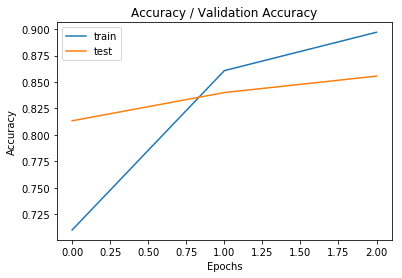

In [212]:
pyplot.title('Accuracy / Validation Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [151]:
a = ['1','2','3','4','5','6','7']

In [152]:
b = a[2:]

In [153]:
b

['3', '4', '5', '6', '7']

In [156]:
c = a[2:4]

In [157]:
c

['3', '4']

In [176]:
df_test = df_result[20000:20010] # 20 Tane
df_test

Comment             Brand  \
3142  Siparişim kapıya bırakıldı ve kuryeyle haliyle...             Getir   
3150  26 Temmuz 2020 detrendyoldan bir alışveriş yap...       Sürat Kargo   
3164  Ankara'dan Mersin'deki arkadaşıma ev hediyesi ...    Horoz Lojistik   
3175  İkidir fırsat kolisinden sipariş verdiğim karg...         MNG Kargo   
3181  Pazar günü Trendyol dan sipariş verdim. Pazart...  Trendyol Express   
3190  Bir TV ünitesi sipariş ettim. Aras Kargo'yla g...        Aras Kargo   
3192  5308*36*033* numaralı siparişim evime bile uğr...         MNG Kargo   
3194  12 ağustostan beri siparişim kargoda bekliyor ...  Trendyol Express   
3196  Sipariş etmiş olduğum 3 adet pantolon yerine 2...        Aras Kargo   
3247  İnternet sipariş etik, gönderici Aras Kargo se...        Aras Kargo   

      Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  iade  \
3142  Taşıma        0     0        0                   0      0     0     0   
3150  Taşıma        1     0        0                   0      0     0     0   
3164  Taşıma        0     0        0                   0      0     0     0   
3175  Taşıma        0     0        0                   0      0     0     0   
3181  Taşıma        1     0        0                   0      0     0     0   
3190  Taşıma        0     0        0                   0      0     0     0   
3192  Taşıma        1     1        0                   0      0     0     0   
3194  Taşıma        0     0        0                   0      0     0     0   
3196  Taşıma        0     0        0                   0      0     0     0   
3247  Taşıma        1     1        0                   0      0     0     0   

      Ödeme  Eksik Ürün  
3142      0           0  
3150      0           0  
3164      0           0  
3175      0           0  
3181      0           0  
3190      0           0  
3192      0           0  
3194      0           0  
3196      0           0  
3247      0           0

In [179]:
df_test = df_test['Comment'].tolist()

In [180]:


# Verilen örnekler Tokenizer yapısı ile tam sayı dizisine dönüştürülür
# Daha sonra eğitilen modele sırayla verilerek anlam analizi sonuçları elde edilir.
# Her Cümlenin yüzde kaç olumlu ve olumsuz olduğuna dair bilgiler çıktı olarak verilir.
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.6784093  0.3215907 ]
 [0.9809795  0.01902047]
 [0.14967081 0.85032916]
 [0.9238201  0.07617984]
 [0.82795525 0.17204481]
 [0.9985643  0.00143576]
 [0.9860265  0.01397343]
 [0.99126714 0.00873286]
 [0.92149454 0.07850544]
 [0.90409935 0.09590064]]


# Sube

In [253]:
df_results_1 = df_result[10000:15000]


In [254]:
df_results_1['Şube'].value_counts()

0    3939
1    1061
Name: Şube, dtype: int64

In [258]:
Tokenize()

In [259]:
#Sector	Gecikme	Şube	Dağıtım	Müşteri Hizmetleri	Kargo	Stok	iade	Ödeme	Eksik Ürün
Y = pd.get_dummies(df_results_1['Şube']).values


In [260]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 85s - loss: 0.1695 - accuracy: 0.7896 - val_loss: 0.1908 - val_accuracy: 0.7533
Epoch 2/3
 - 87s - loss: 0.1543 - accuracy: 0.7946 - val_loss: 0.1956 - val_accuracy: 0.7422
Epoch 3/3
 - 87s - loss: 0.1224 - accuracy: 0.8368 - val_loss: 0.2118 - val_accuracy: 0.7311
score: 0.74


In [284]:
df_test = df_result[20000:20010] # 20 Tane
#df_test

In [285]:
df_test = df_test['Comment'].tolist()
#df_test

In [286]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.5007127  0.49928737]
 [0.49788496 0.50211495]
 [0.50977093 0.49022907]
 [0.4975782  0.5024218 ]
 [0.5014851  0.4985149 ]
 [0.5012429  0.49875715]
 [0.4978277  0.50217235]
 [0.49605587 0.5039441 ]
 [0.49909306 0.500907  ]
 [0.50556546 0.4944345 ]]


# Dağıtım

In [ ]:
##Sector	Gecikme	Şube	Dağıtım	Müşteri Hizmetleri	Kargo	Stok	iade	Ödeme	Eksik Ürün

In [295]:
df_results_1 = df_result[25000:30000]


In [297]:
df_results_1['Dağıtım'].value_counts()

0    4613
1     387
Name: Dağıtım, dtype: int64

In [298]:
Tokenize()

In [299]:
Y = pd.get_dummies(df_results_1['Dağıtım']).values


In [300]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 92s - loss: 0.0855 - accuracy: 0.9183 - val_loss: 0.0711 - val_accuracy: 0.9289
Epoch 2/3
 - 89s - loss: 0.0758 - accuracy: 0.9242 - val_loss: 0.0711 - val_accuracy: 0.9289
Epoch 3/3
 - 87s - loss: 0.0758 - accuracy: 0.9242 - val_loss: 0.0711 - val_accuracy: 0.9289
score: 0.90


In [301]:
df_test = df_result[20000:20010] # 20 Tane
df_test

Comment        Brand  \
54061  Sipariş Numarası: 1201************12 beklettik...         IKEA   
61289  Trendyol'dan 27 Mayıs'ta sipariş verdiğim ürün...  Sürat Kargo   
40125  Morhipo alışverişim Aras Kargo ile gönderilece...   Aras Kargo   
78102  14.5.2020 tarihinde verdiğim W115473660 numara...          D&R   
79307  Trendyol üzerinden 8 Mayıs'ta sipariş vermişti...    MNG Kargo   
31644  Trendyol'dan 23.06.2020 de sipariş verdiğim ür...  Sürat Kargo   
26740  Siparişime ait kargonun 13.07.2020 tarihinde s...    MNG Kargo   
77192  20/05/2020 de sipariş verdiğim ürün hakkında b...       Boyner   
33370  Trendyol'dan Dermaroller sipariş verdim aynı a...  Sürat Kargo   
94640  11 gün önce sipariş verdiğim ürün hala tedarik...       Boyner   

         Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  \
54061  EvEsyasi        1     0        0                   0      0     0   
61289    Taşıma        0     0        0                   0      0     0   
40125    Taşıma        1     1        1                   0      0     0   
78102     Kitap        0     0        0                   0      1     0   
79307    Taşıma        1     1        1                   0      0     0   
31644    Taşıma        0     0        1                   0      0     0   
26740    Taşıma        0     1        1                   0      0     0   
77192     Giyim        0     0        0                   0      1     0   
33370    Taşıma        0     0        0                   0      0     0   
94640     Giyim        0     0        0                   0      1     0   

       iade  Ödeme  Eksik Ürün  
54061     0      0           0  
61289     0      0           0  
40125     0      0           0  
78102     0      0           0  
79307     0      0           0  
31644     0      0           0  
26740     0      0           0  
77192     1      0           0  
33370     0      0           0  
94640     1      0           0

In [302]:
df_test = df_test['Comment'].tolist()
#df_test

In [303]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.5007127  0.49928737]
 [0.49788496 0.50211495]
 [0.50977093 0.49022907]
 [0.4975782  0.5024218 ]
 [0.5014851  0.4985149 ]
 [0.5012429  0.49875715]
 [0.4978277  0.50217235]
 [0.49605587 0.5039441 ]
 [0.49909306 0.500907  ]
 [0.50556546 0.4944345 ]]


# Müşteri Hizmetleri

In [310]:
df_results_1 = df_result[15000:20000]

In [311]:
df_results_1['Müşteri Hizmetleri'].value_counts()

0    4515
1     485
Name: Müşteri Hizmetleri, dtype: int64

In [312]:
Tokenize()

In [313]:
Y = pd.get_dummies(df_results_1['Müşteri Hizmetleri']).values


In [314]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 85s - loss: 0.1006 - accuracy: 0.8948 - val_loss: 0.0825 - val_accuracy: 0.9089
Epoch 2/3
 - 86s - loss: 0.0843 - accuracy: 0.9012 - val_loss: 0.0850 - val_accuracy: 0.9089
Epoch 3/3
 - 89s - loss: 0.0702 - accuracy: 0.9116 - val_loss: 0.0991 - val_accuracy: 0.8689
score: 0.90


In [316]:
df_test = df_result[1000:1010] # 20 Tane
df_test

Comment           Brand  \
28399  Kargomuz 1 hafta oldu gelmedi. Babaannem adına...       MNG Kargo   
34598  13.05.2020 tarihinde sipariş verdiğim Zen Home...          Tekzen   
45761  Trendyol'dan istettiğim siparişim MNG Kargo il...       MNG Kargo   
72051  Boyner'in internet sitesinden den 22 Mayıs'ta ...          Boyner   
28789  01.07.20 aldığım ürün Aras Kargo ile gönderild...      Aras Kargo   
85497  1275**56 05.05.2020 de verdiğim siparişlerden ...         DeFacto   
16653  16.07 Tarihinde Koçtaş'tan siparişimi teslim a...  Horoz Lojistik   
23867  29 Haziran'da verdiğim 7267500 sipariş numaral...          Boyner   
16707  3 Haziran 2020'de verdiğimiz 210306201026616 n...            IKEA   
46367  31 Mayıs tarihinde satın aldığım 100... 4505 n...          Boyner   

         Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  \
28399    Taşıma        0     1        1                   0      0     0   
34598  EvEsyasi        1     0        0                   1      0     0   
45761    Taşıma        0     0        0                   0      0     0   
72051     Giyim        0     0        0                   0      1     0   
28789    Taşıma        1     1        0                   0      0     0   
85497     Giyim        0     0        0                   0      1     0   
16653    Taşıma        0     0        0                   0      0     0   
23867     Giyim        0     0        0                   0      1     0   
16707  EvEsyasi        0     0        0                   0      0     0   
46367     Giyim        0     0        0                   1      1     0   

       iade  Ödeme  Eksik Ürün  
28399     0      0           0  
34598     0      0           0  
45761     0      0           0  
72051     1      0           0  
28789     0      0           0  
85497     0      0           0  
16653     0      0           0  
23867     1      0           0  
16707     1      0           0  
46367     1      0           0

In [317]:
df_test = df_test['Comment'].tolist()
#df_test

In [318]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.501923   0.49807706]
 [0.50098485 0.49901506]
 [0.50145805 0.49854192]
 [0.5024906  0.49750948]
 [0.50157595 0.49842402]
 [0.49829498 0.50170505]
 [0.50394994 0.49605006]
 [0.49627087 0.5037291 ]
 [0.5005573  0.49944267]
 [0.5034695  0.4965304 ]]


# KARGO

In [197]:
#'Gecikme	Sube	Dagitim	m_hizmetleri	Kargo	Stok	iade	odeme	eksin_urun

In [225]:
Y = pd.get_dummies(df_results_1['Kargo']).values


In [226]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 95s - loss: 0.1892 - accuracy: 0.7205 - val_loss: 0.1832 - val_accuracy: 0.7444
Epoch 2/3
 - 93s - loss: 0.1142 - accuracy: 0.8516 - val_loss: 0.1354 - val_accuracy: 0.8200
Epoch 3/3
 - 93s - loss: 0.1028 - accuracy: 0.8674 - val_loss: 0.1438 - val_accuracy: 0.8156
score: 0.85


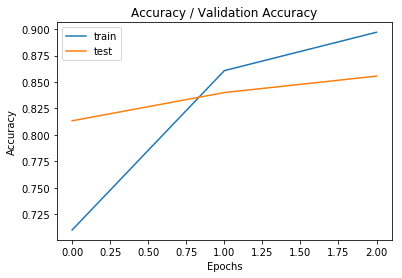

In [228]:
pyplot.title('Accuracy / Validation Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [235]:
df_test = df_result[6000:6010] # 10 Tane
df_test

Comment       Brand Sector  \
30119  19/06/2020 de taraflarına ulaşan 4000***7600 n...     Bershka  Giyim   
30132  24.06.2020 tarihinde 3180.02 TL tutarında onli...  LC Waikiki  Giyim   
30135  2007061006023 numaralı siparişimde bilgim olma...  LC Waikiki  Giyim   
30137  Ayakkabı aldım sitenizde siparişler kısmında g...      Boyner  Giyim   
30138  Dün gece 8 adet t-shirt ve mutfak eşyası sipar...     DeFacto  Giyim   
30156  Geçen haftalarda online siteden oğluma bir ürü...  LC Waikiki  Giyim   
30166  03/06/2020 tarihinde vermiş olduğum,4000656485...     Bershka  Giyim   
30179  07/07/2020 tarihinde 2007****35002 numaralı si...  LC Waikiki  Giyim   
30182  Ankara Keçiören Bağlarbaşı Kızlarpınarı Cad ma...  LC Waikiki  Giyim   
30184  29.06.20 tarihinde elime ulaşan siparişimde ek...  LC Waikiki  Giyim   

       Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  iade  Ödeme  \
30119        0     0        0                   0      0     0     0      0   
30132        0     0        0                   0      0     0     1      0   
30135        0     0        0                   0      1     0     0      0   
30137        0     0        0                   0      1     0     1      0   
30138        0     0        0                   0      1     0     0      0   
30156        0     0        0                   1      1     0     1      0   
30166        0     0        0                   0      0     0     1      0   
30179        0     0        0                   0      0     0     0      0   
30182        0     0        0                   0      0     0     0      0   
30184        0     0        0                   0      0     0     0      0   

       Eksik Ürün  
30119           0  
30132           0  
30135           0  
30137           0  
30138           0  
30156           0  
30166           0  
30179           0  
30182           0  
30184           0

In [236]:
df_test = df_test['Comment'].tolist()

In [237]:
# Verilen örnekler Tokenizer yapısı ile tam sayı dizisine dönüştürülür
# Daha sonra eğitilen modele sırayla verilerek anlam analizi sonuçları elde edilir.
# Her Cümlenin yüzde kaç olumlu ve olumsuz olduğuna dair bilgiler çıktı olarak verilir.
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.5028876  0.49711233]
 [0.5089845  0.49101555]
 [0.49899632 0.50100374]
 [0.50101465 0.49898526]
 [0.50128937 0.4987107 ]
 [0.49633962 0.5036603 ]
 [0.5055324  0.49446768]
 [0.5061464  0.49385357]
 [0.50343126 0.49656874]
 [0.50458056 0.49541944]]


# Stok

In [ ]:
#Stok	iade	Ödeme	Eksik Ürün

In [332]:
df_results_1 = df_result[30000:35000]

In [333]:
df_results_1['Stok'].value_counts()

0    4938
1      62
Name: Stok, dtype: int64

In [334]:
Tokenize()

In [335]:
Y = pd.get_dummies(df_results_1['Stok']).values


In [336]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 95s - loss: 0.0259 - accuracy: 0.9830 - val_loss: 0.0222 - val_accuracy: 0.9778
Epoch 2/3
 - 91s - loss: 0.0119 - accuracy: 0.9881 - val_loss: 0.0222 - val_accuracy: 0.9778
Epoch 3/3
 - 99s - loss: 0.0119 - accuracy: 0.9881 - val_loss: 0.0222 - val_accuracy: 0.9778
score: 0.99


In [360]:
df_test = df_result[40200:40210] # 20 Tane
df_test

Comment        Brand  \
89783  18 Mayıs tarihinde 2 adet kitap sipariş verdim...    Kitap Seç   
92208  21.05.2020 tarihinde verdiğim 8135******23 tak...   Aras Kargo   
51696  Tekzen'den 1,5 ay önce masa siparişi verdim. S...       Tekzen   
43772  Bir ay bekledikten sonra gelen siparişimin baş...        Penti   
60042  Trendyol'dan vermiş olduğum siparişi MNG Kargo...    MNG Kargo   
95803  19.05.2020 tarihinde Media Markt internet site...  Media Markt   
60876  20/05/2020 tarihinde sipariş verdiğim ürün 2 h...       Tekzen   
73468  Yaklaşık 2 ay önce 2 t-shirt sipariş verdim. B...      DeFacto   
61142  29.05'te verdiğim sipariş 02.06'da UPS Türkiye...  UPS Türkiye   
92827  25 Mayıs pazartesi sipariş verdiğim p305***135...       Gratis   

          Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  \
89783      Kitap        0     0        0                   0      1     1   
92208     Taşıma        1     1        0                   0      0     0   
51696   EvEsyasi        1     0        0                   0      0     0   
43772      Giyim        0     0        0                   0      1     0   
60042     Taşıma        1     0        0                   0      0     0   
95803  Teknoloji        1     0        0                   1      0     0   
60876   EvEsyasi        1     0        0                   0      0     0   
73468      Giyim        0     0        0                   0      1     0   
61142     Taşıma        1     0        0                   0      0     0   
92827      Giyim        0     0        0                   0      0     0   

       iade  Ödeme  Eksik Ürün  
89783     0      0           0  
92208     0      0           0  
51696     1      0           0  
43772     0      0           0  
60042     0      0           0  
95803     0      0           0  
60876     0      0           0  
73468     1      0           0  
61142     0      0           0  
92827     0      0           0

In [361]:
df_test = df_test['Comment'].tolist()
#df_test

In [362]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.49956816 0.50043184]
 [0.50410515 0.49589482]
 [0.5049621  0.4950379 ]
 [0.5022328  0.49776727]
 [0.505591   0.49440897]
 [0.50303245 0.4969676 ]
 [0.5030588  0.49694124]
 [0.50473243 0.49526748]
 [0.50479996 0.4952    ]
 [0.5013902  0.49860978]]


# iade

In [363]:
df_results_1 = df_result[30000:35000]

In [364]:
df_results_1['iade'].value_counts()

0    3920
1    1080
Name: iade, dtype: int64

In [365]:
Tokenize()

In [366]:
Y = pd.get_dummies(df_results_1['iade']).values


In [367]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 88s - loss: 0.1732 - accuracy: 0.7847 - val_loss: 0.1819 - val_accuracy: 0.7622
Epoch 2/3
 - 87s - loss: 0.1584 - accuracy: 0.7862 - val_loss: 0.1841 - val_accuracy: 0.7578
Epoch 3/3
 - 92s - loss: 0.1272 - accuracy: 0.8237 - val_loss: 0.2048 - val_accuracy: 0.7489
score: 0.73


In [368]:
df_test = df_result[1000:1010] # 20 Tane
df_test

Comment           Brand  \
28399  Kargomuz 1 hafta oldu gelmedi. Babaannem adına...       MNG Kargo   
34598  13.05.2020 tarihinde sipariş verdiğim Zen Home...          Tekzen   
45761  Trendyol'dan istettiğim siparişim MNG Kargo il...       MNG Kargo   
72051  Boyner'in internet sitesinden den 22 Mayıs'ta ...          Boyner   
28789  01.07.20 aldığım ürün Aras Kargo ile gönderild...      Aras Kargo   
85497  1275**56 05.05.2020 de verdiğim siparişlerden ...         DeFacto   
16653  16.07 Tarihinde Koçtaş'tan siparişimi teslim a...  Horoz Lojistik   
23867  29 Haziran'da verdiğim 7267500 sipariş numaral...          Boyner   
16707  3 Haziran 2020'de verdiğimiz 210306201026616 n...            IKEA   
46367  31 Mayıs tarihinde satın aldığım 100... 4505 n...          Boyner   

         Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  \
28399    Taşıma        0     1        1                   0      0     0   
34598  EvEsyasi        1     0        0                   1      0     0   
45761    Taşıma        0     0        0                   0      0     0   
72051     Giyim        0     0        0                   0      1     0   
28789    Taşıma        1     1        0                   0      0     0   
85497     Giyim        0     0        0                   0      1     0   
16653    Taşıma        0     0        0                   0      0     0   
23867     Giyim        0     0        0                   0      1     0   
16707  EvEsyasi        0     0        0                   0      0     0   
46367     Giyim        0     0        0                   1      1     0   

       iade  Ödeme  Eksik Ürün  
28399     0      0           0  
34598     0      0           0  
45761     0      0           0  
72051     1      0           0  
28789     0      0           0  
85497     0      0           0  
16653     0      0           0  
23867     1      0           0  
16707     1      0           0  
46367     1      0           0

In [369]:
df_test = df_test['Comment'].tolist()
#df_test

In [370]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.501923   0.49807706]
 [0.50098485 0.49901506]
 [0.50145805 0.49854192]
 [0.5024906  0.49750948]
 [0.50157595 0.49842402]
 [0.49829498 0.50170505]
 [0.50394994 0.49605006]
 [0.49627087 0.5037291 ]
 [0.5005573  0.49944267]
 [0.5034695  0.4965304 ]]


# Ödeme

In [371]:
df_results_1 = df_result[30000:35000]

In [372]:
df_results_1['Ödeme'].value_counts()

0    4928
1      72
Name: Ödeme, dtype: int64

In [373]:
Tokenize()

In [374]:
Y = pd.get_dummies(df_results_1['Ödeme']).values


In [375]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 98s - loss: 0.0291 - accuracy: 0.9822 - val_loss: 0.0111 - val_accuracy: 0.9889
Epoch 2/3
 - 99s - loss: 0.0153 - accuracy: 0.9847 - val_loss: 0.0111 - val_accuracy: 0.9889
Epoch 3/3
 - 97s - loss: 0.0153 - accuracy: 0.9847 - val_loss: 0.0111 - val_accuracy: 0.9889
score: 0.99


In [379]:
df_test = df_result[2000:2010] # 20 Tane
df_test

Comment             Brand  \
35803  Gratis internet mağazasından 9 Haziran 2020 de...            Gratis   
69083  1006**1307 sipariş numarası ile 16 Mayıs 2020 ...            Boyner   
92495  Sırf MNG Kargo'nun kargomu bana ulaştıramadığı...         MNG Kargo   
4890   9 Ağustos'ta  kedi tuvaleti siparişi verdim. 1...         MNG Kargo   
50757  15 gün oldu sipariş vereli hala gelecek. Samsu...       Sürat Kargo   
48524  Pizza teslim edilmedi. Fakat pizza takipte piz...    Domino's Pizza   
61701  Pazartesi yola çıkan kargom 2 gündür hala dağı...         MNG Kargo   
7196   1 adet delta plates çemberi sipariş ettim 23.0...  Trendyol Express   
62096  N11.com'dan sipariş ettiğim ürünün bir haftada...        Aras Kargo   
44274  Kuşadası Sürat Kargo aracılığıyla. 10524520842...       Sürat Kargo   

       Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  iade  \
35803   Giyim        0     0        0                   0      0     0     1   
69083   Giyim        0     0        0                   1      1     0     1   
92495  Taşıma        0     0        0                   0      0     0     0   
4890   Taşıma        1     1        0                   0      0     0     0   
50757  Taşıma        1     1        0                   0      0     0     0   
48524   Yemek        1     1        0                   0      0     0     0   
61701  Taşıma        1     1        1                   0      0     0     0   
7196   Taşıma        0     1        0                   0      0     0     0   
62096  Taşıma        1     1        0                   0      0     0     0   
44274  Taşıma        1     0        1                   0      0     0     0   

       Ödeme  Eksik Ürün  
35803      0           0  
69083      0           0  
92495      0           0  
4890       0           0  
50757      0           0  
48524      1           0  
61701      0           0  
7196       0           0  
62096      0           0  
44274      0           0

In [380]:
df_test = df_test['Comment'].tolist()
#df_test

In [381]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.49741423 0.50258577]
 [0.49884778 0.5011522 ]
 [0.5001815  0.4998185 ]
 [0.498162   0.501838  ]
 [0.50132513 0.4986749 ]
 [0.5011659  0.49883413]
 [0.5018207  0.49817938]
 [0.5031023  0.49689764]
 [0.5039035  0.49609643]
 [0.5026198  0.4973802 ]]


# Eksik Ürün

In [384]:
df_results_1 = df_result[20000:25000]

In [385]:
df_results_1['Eksik Ürün'].value_counts()

0    4976
1      24
Name: Eksik Ürün, dtype: int64

In [386]:
Tokenize()

In [387]:
Y = pd.get_dummies(df_results_1['Eksik Ürün']).values


In [388]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 89s - loss: 0.0185 - accuracy: 0.9899 - val_loss: 0.0044 - val_accuracy: 0.9956
Epoch 2/3
 - 94s - loss: 0.0049 - accuracy: 0.9951 - val_loss: 0.0044 - val_accuracy: 0.9956
Epoch 3/3
 - 99s - loss: 0.0049 - accuracy: 0.9951 - val_loss: 0.0044 - val_accuracy: 0.9956
score: 1.00


In [389]:
df_test = df_result[1000:1010] # 20 Tane
df_test

Comment           Brand  \
28399  Kargomuz 1 hafta oldu gelmedi. Babaannem adına...       MNG Kargo   
34598  13.05.2020 tarihinde sipariş verdiğim Zen Home...          Tekzen   
45761  Trendyol'dan istettiğim siparişim MNG Kargo il...       MNG Kargo   
72051  Boyner'in internet sitesinden den 22 Mayıs'ta ...          Boyner   
28789  01.07.20 aldığım ürün Aras Kargo ile gönderild...      Aras Kargo   
85497  1275**56 05.05.2020 de verdiğim siparişlerden ...         DeFacto   
16653  16.07 Tarihinde Koçtaş'tan siparişimi teslim a...  Horoz Lojistik   
23867  29 Haziran'da verdiğim 7267500 sipariş numaral...          Boyner   
16707  3 Haziran 2020'de verdiğimiz 210306201026616 n...            IKEA   
46367  31 Mayıs tarihinde satın aldığım 100... 4505 n...          Boyner   

         Sector  Gecikme  Şube  Dağıtım  Müşteri Hizmetleri  Kargo  Stok  \
28399    Taşıma        0     1        1                   0      0     0   
34598  EvEsyasi        1     0        0                   1      0     0   
45761    Taşıma        0     0        0                   0      0     0   
72051     Giyim        0     0        0                   0      1     0   
28789    Taşıma        1     1        0                   0      0     0   
85497     Giyim        0     0        0                   0      1     0   
16653    Taşıma        0     0        0                   0      0     0   
23867     Giyim        0     0        0                   0      1     0   
16707  EvEsyasi        0     0        0                   0      0     0   
46367     Giyim        0     0        0                   1      1     0   

       iade  Ödeme  Eksik Ürün  
28399     0      0           0  
34598     0      0           0  
45761     0      0           0  
72051     1      0           0  
28789     0      0           0  
85497     0      0           0  
16653     0      0           0  
23867     1      0           0  
16707     1      0           0  
46367     1      0           0

In [390]:
df_test = df_test['Comment'].tolist()
#df_test

In [391]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.501923   0.49807706]
 [0.50098485 0.49901506]
 [0.50145805 0.49854192]
 [0.5024906  0.49750948]
 [0.50157595 0.49842402]
 [0.49829498 0.50170505]
 [0.50394994 0.49605006]
 [0.49627087 0.5037291 ]
 [0.5005573  0.49944267]
 [0.5034695  0.4965304 ]]
